# Power Factor Prediction of line 1 PFL1

The power factor is the cosine of the phase difference between voltage and current, and as a result, the power factor is measured using the formula Power Factor = cosɸ, where ɸ is the phase difference between the voltage and current phasor.

The power factor values lies in the range of 0 to 1

As per the ideal condition the power factor should be closer to 1 i.e is unity.

 Gnerally, a power factor of 0.9 or above is considered as a good power factor.

# Power Factor= Active Power/Apparent Power as per power triangle

# The generating voltage is in the range of 11kV to 25kV.


# After the power is generated say at 11kV, the voltage is stepped up using transformers and then it is transmitted through transmission line at a higher voltages.

# The higher the voltage better it is as transmission and distribution loss will be minuscule at higher voltage.

# Assumption made: 

# I am considering given data for 400kV transmission line looking at the line current profile/data and Maximum demand profile/data.


# For 400kV line ACSR(Aluminium conductor steel reinforced ) Moose conductor is used with a current carrying capacity of 600A depending on ambient temperature.

# Independent Features:
1)VL1: Phase voltage of line1 in Volts(V)
2)VL2: Phase volatge of line2 in Volts(V)
3)VL3: Phase voltage of line3 in Volts(V)
4)IL1: Line current for line1 in ampere(A)
5)IL2: Line current for line2 in ampere(A)
6)IL3:Line current for line3 in ampere (A)
7)VL12:Line voltage between line1 and line2 in Volts(V)
8)VL23:Line voltage between line2 and line3 in Volts(V)
9)VL31:Line voltage between line3 and line1 in Volts(V)
10)INUT:Current flowing in neutral wire in ampere(A)
11)PFL2:Power factor of line2
12)PFL3: Power factor of line3
13)Avg_PF: Average of Power factor of line1, line2 and line3
14)Sum_PF: Sum of power factor
15)FRQ: Frequency of the system in Hertz(Hz)
16)THDVL1: Total Harmonic distortion i.e voltage distortion for line1 in decibels(dB)
17)THDVL2:Total harmonic distortion i.e voltage distortion for line2 in decibels(dB)
18)THDVL3:Total harmonic distortion i.e voltage distortion for line3 in decibels(dB)
19)THDIL1:Total harmonic distortion i.e current distortion for line1 in decibels(dB)
20)THDIL2:Total harmonic distortion i.e current distortion for line2 in decibels(dB)
21)THDIL3:TOtal harmonic distortion i.e current distortion for line3 in decibels(dB)
22)MDIL1: Maximum Demand in MVA for line1
23)MDIL2:Maximum Demand in MVA for line2
24)MDIL3: Maximum Demand in MVA for line3.

# Target Features
PLF1: Power factor of line1

# As the target variable PFL1 is continuous is nature it is a Regression problem.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df1=pd.read_csv('CurrentVoltage.csv')

In [3]:
df2=pd.read_csv('PowerFactor.csv')

Concating two dataframes and merging it into one.

In [4]:
df3=pd.concat([df1,df2],axis=1)

In [5]:
df4=pd.DataFrame(df3)

As per the discussion I am dropping time series feature named as DeviceTimeStamp from the dataset.

In [6]:
df4.drop('DeviceTimeStamp',axis=1,inplace=True)

In [7]:
df4

,VL1,VL2,VL3,IL1,IL2,IL3,VL12,VL23,VL31,INUT,...,FRQ,THDVL1,THDVL2,THDVL3,THDIL1,THDIL2,THDIL3,MDIL1,MDIL2,MDIL3
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,238.7,238.7,238.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,238.4,238.5,238.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,239.9,240.0,240.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,49.9,1.7,1.7,1.7,0.0,0.0,0.0,92.7,0.0,0.0
4,239.9,240.0,240.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,50.0,1.6,1.6,1.6,0.0,0.0,0.0,92.7,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19347,246.4,244.7,244.3,79.0,45.4,86.6,426.0,422.3,426.1,38.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19348,246.8,245.1,244.8,77.0,42.0,84.2,426.8,423.1,427.1,39.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19349,247.8,246.0,246.0,77.4,37.1,75.4,428.5,425.0,428.7,38.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19350,247.7,245.9,245.5,70.1,36.7,88.1,428.2,424.3,428.4,45.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df4.shape

(19352, 25)

There are 19352 records and 25 features in this dataset.

In [9]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19352 entries, 0 to 19351
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   VL1     19352 non-null  float64
 1   VL2     19352 non-null  float64
 2   VL3     19352 non-null  float64
 3   IL1     19352 non-null  float64
 4   IL2     19352 non-null  float64
 5   IL3     19352 non-null  float64
 6   VL12    19352 non-null  float64
 7   VL23    19352 non-null  float64
 8   VL31    19352 non-null  float64
 9   INUT    19352 non-null  float64
 10  PFL1    19308 non-null  float64
 11  PFL2    19308 non-null  float64
 12  PFL3    19308 non-null  float64
 13  Avg_PF  19308 non-null  float64
 14  Sum_PF  19308 non-null  float64
 15  FRQ     19308 non-null  float64
 16  THDVL1  19308 non-null  float64
 17  THDVL2  19308 non-null  float64
 18  THDVL3  19308 non-null  float64
 19  THDIL1  19308 non-null  float64
 20  THDIL2  19308 non-null  float64
 21  THDIL3  19308 non-null  float64
 22

All the features are of float datatype.

In [10]:
df4.isnull().sum()

VL1        0
VL2        0
VL3        0
IL1        0
IL2        0
IL3        0
VL12       0
VL23       0
VL31       0
INUT       0
PFL1      44
PFL2      44
PFL3      44
Avg_PF    44
Sum_PF    44
FRQ       44
THDVL1    44
THDVL2    44
THDVL3    44
THDIL1    44
THDIL2    44
THDIL3    44
MDIL1     44
MDIL2     44
MDIL3     44
dtype: int64

There are null values in the features named as PFL1,PFL2,PFL3,Avg_PF,Sum_PF,FRQ,THDVL1,THDVL2,THDVL3,THDIL1,THDIL2 ,THDIL3,MDIL1, MDIL2 and MDIL3.         

I am dropping null/missing values from the dataset as after dropping it the data loss is around 0.22%(44/19352) which is well within the limit of 8 to 10%.

In [11]:
df4.dropna(inplace=True)

The null/Missing values are removed from the dataset.

In [12]:
df4.shape

(19308, 25)

In [14]:
df4.describe()

,VL1,VL2,VL3,IL1,IL2,IL3,VL12,VL23,VL31,INUT,...,FRQ,THDVL1,THDVL2,THDVL3,THDIL1,THDIL2,THDIL3,MDIL1,MDIL2,MDIL3
count,19308.000000,19308.000000,19308.000000,19308.000000,19308.000000,19308.000000,19308.000000,19308.000000,19308.000000,19308.000000,...,19308.000000,19308.000000,19308.000000,19308.000000,19308.000000,19308.000000,19308.000000,19308.000000,19308.000000,19308.000000
mean,241.059483,240.509333,239.905744,73.704402,59.008908,83.220883,379.375337,378.432432,379.870194,26.282582,...,49.935736,1.822861,1.804330,1.830521,11.245608,11.649187,8.653444,149.008675,129.035436,160.757241
std,9.545221,9.811110,8.854791,41.302033,40.500652,43.654768,120.081316,119.536819,120.193439,15.100244,...,0.806603,0.565842,0.585585,0.576210,6.124003,6.040091,4.521779,48.743005,62.818273,61.351476
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,235.400000,235.100000,235.100000,46.700000,31.400000,56.200000,400.600000,401.300000,401.900000,16.800000,...,49.900000,1.400000,1.400000,1.400000,7.100000,7.900000,6.000000,114.100000,98.900000,148.600000
50%,242.700000,242.100000,241.100000,69.400000,50.200000,80.100000,417.700000,416.300000,417.800000,25.500000,...,50.000000,1.800000,1.700000,1.800000,11.100000,11.200000,8.000000,152.300000,135.200000,175.800000
75%,247.500000,246.700000,245.300000,100.100000,82.600000,114.100000,427.500000,425.300000,427.600000,35.700000,...,50.000000,2.200000,2.200000,2.200000,15.300000,15.600000,11.400000,195.000000,170.000000,204.100000
max,261.200000,261.300000,261.300000,224.100000,253.600000,247.300000,446.500000,444.800000,447.300000,145.800000,...,50.200000,6.200000,6.500000,6.300000,30.600000,65.900000,33.100000,234.000000,234.700000,230.500000


# Few observations recorded from above written code
1)From the above it can be said that the features VL1, VL2, VL3,VL12,VL23 and VL31 are having left tail skewness as median is greater than mean and the same needs to be verified using distribution plot.
2)The features IL1,IL2, IL3,INUT are having right tailed skewness as mean is greater than median but the same needs to be verified using distribution plot.
3)There is a hugeW difference between 75% quantile and max values for features IL1,IL2 and IL3. Further,the chances are there outliers can be present in those features and the same needs to be verified using boxplot.

# Univariate Analysis

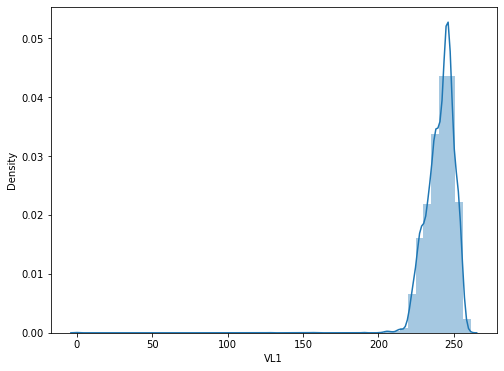

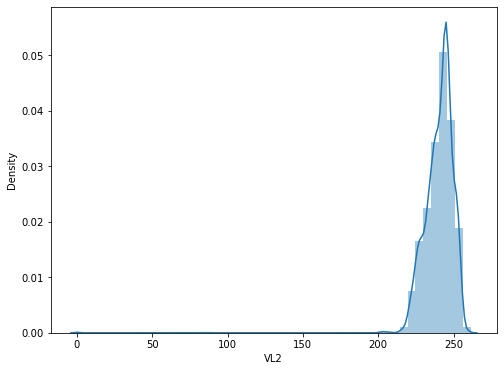

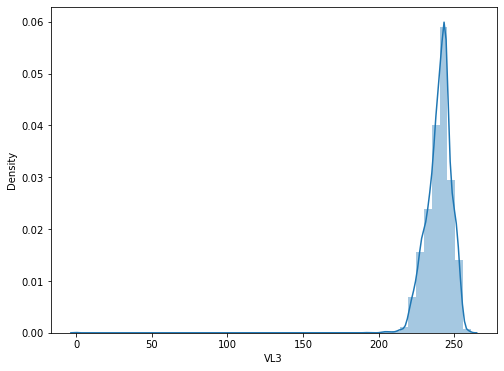

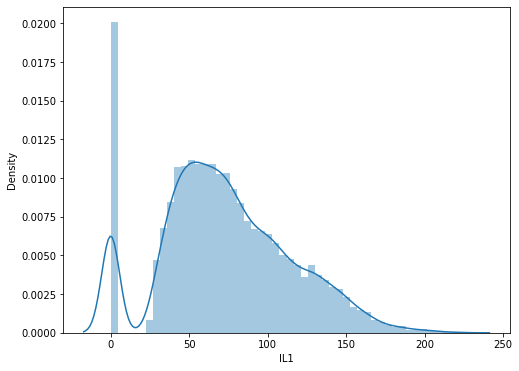

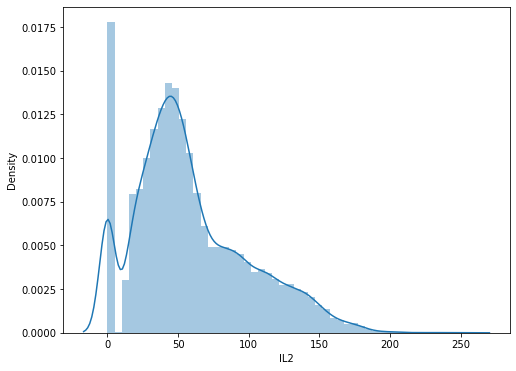

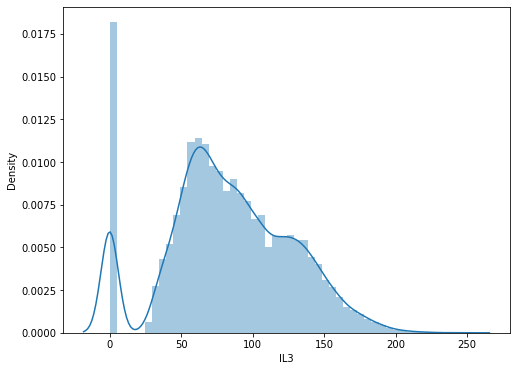

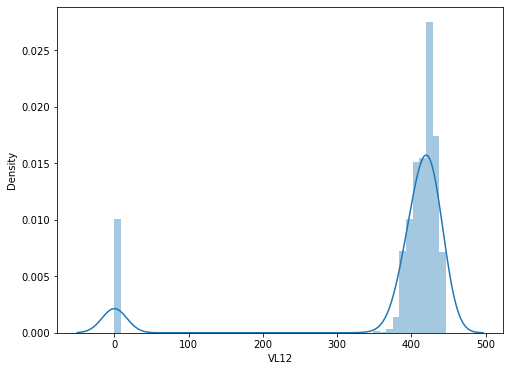

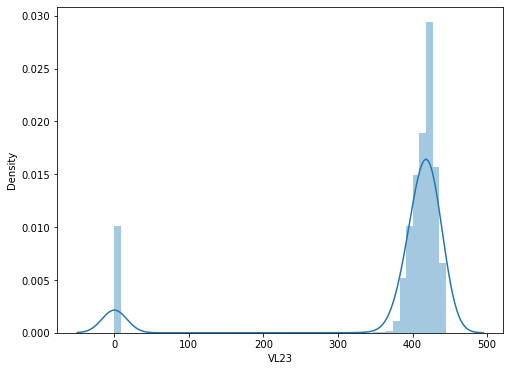

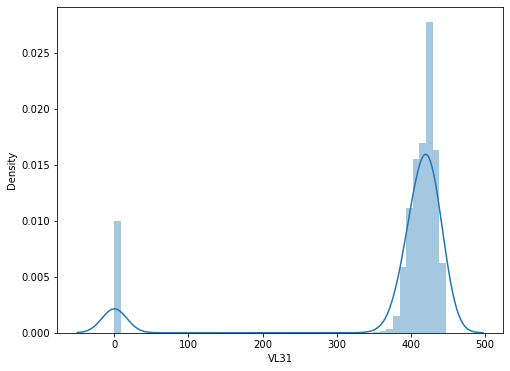

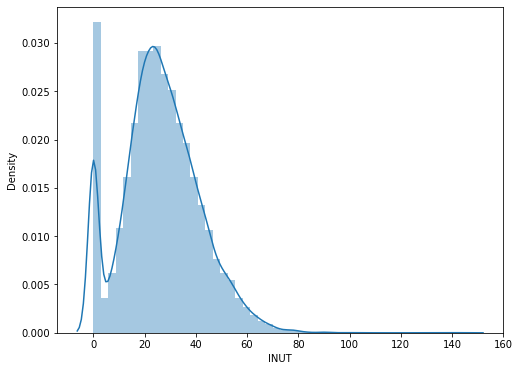

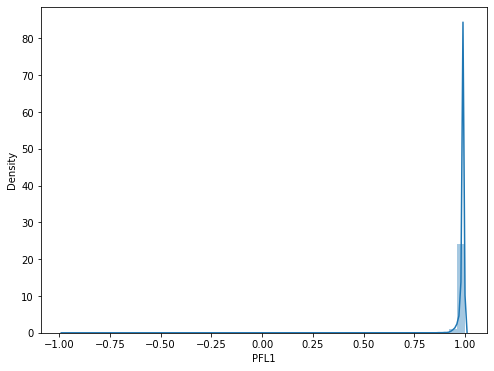

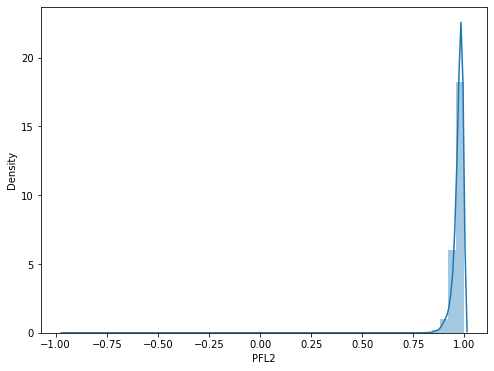

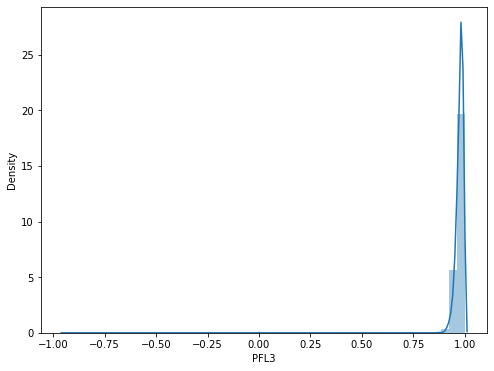

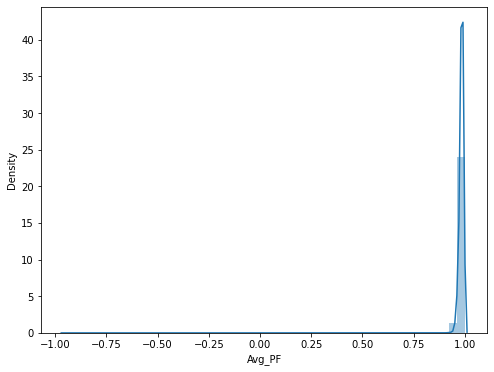

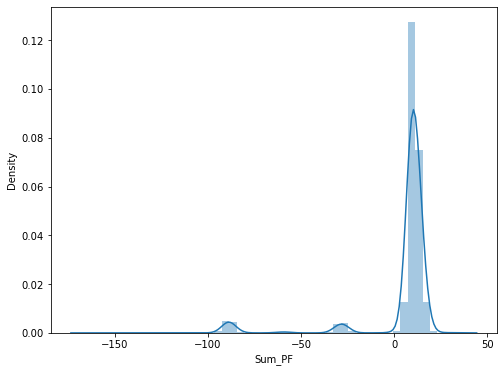

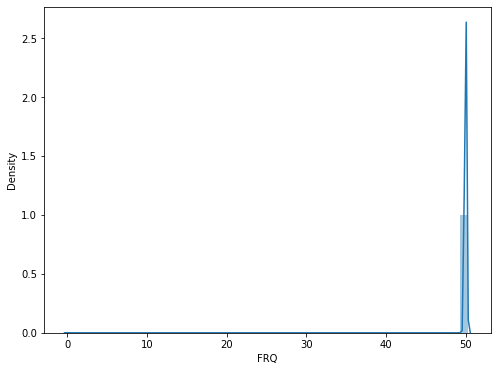

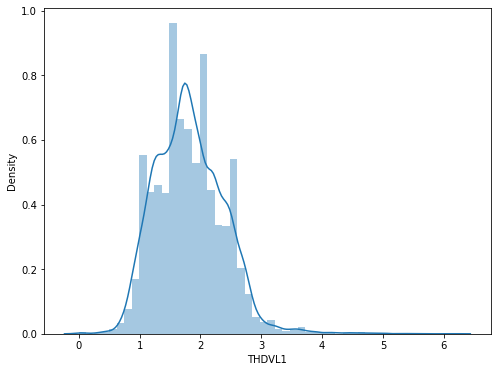

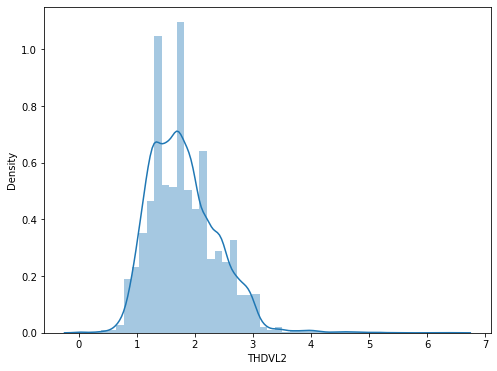

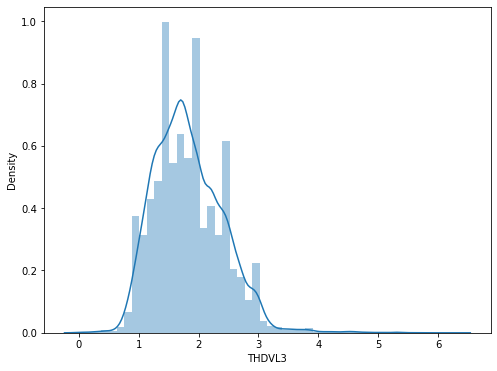

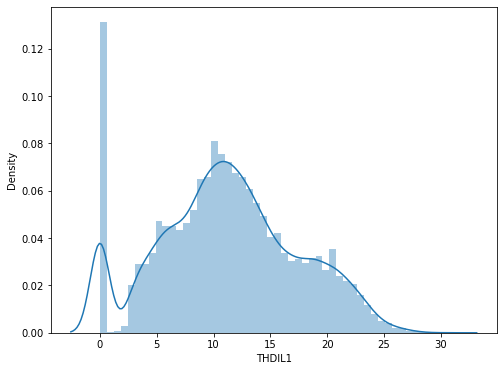

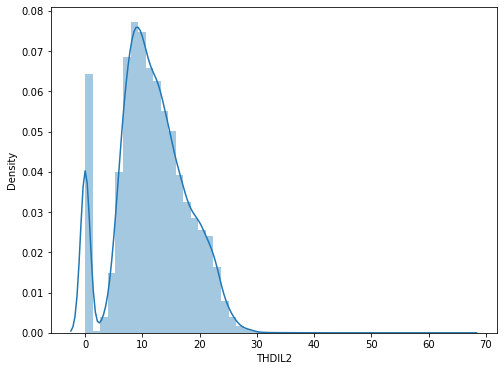

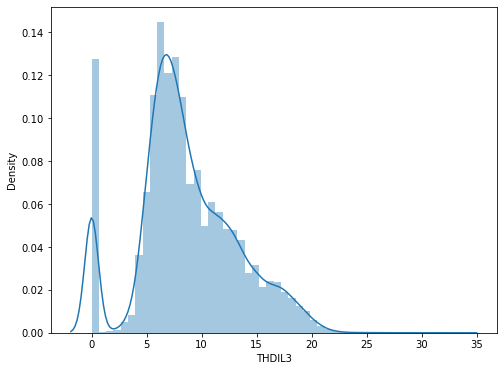

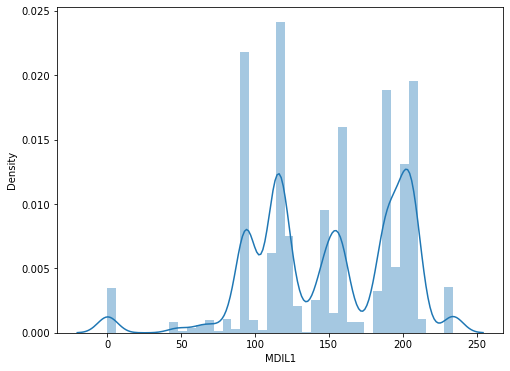

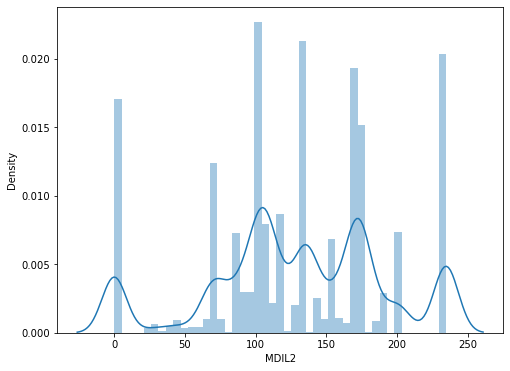

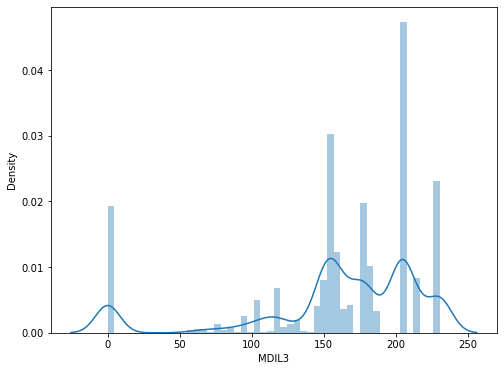

In [14]:
for i in df4.columns:
    plt.figure(figsize=[8,6])
    sns.distplot(df4[i])
    plt.show()

1)From the above distribution plot it can be said that most of the independent features are having skewness. Further, the skewness are of two types right tailed skewness and left tailed skewness.
2)The features having mean greater than median there is a right tailed skewness and for those where median is greater than mean there is a left tailed skewness.

(array([3.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 5.0000e+00,
        4.0000e+00, 1.0000e+00, 3.1000e+01, 4.6010e+03, 1.4663e+04]),
 array([  0.  ,  26.12,  52.24,  78.36, 104.48, 130.6 , 156.72, 182.84,
        208.96, 235.08, 261.2 ]),
 <BarContainer object of 10 artists>)

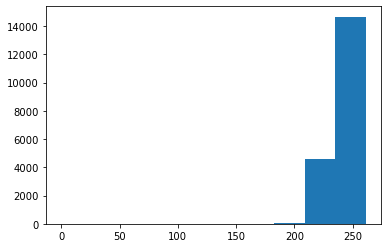

In [15]:
plt.hist(df4['VL1'])

In [16]:
df4[df4['VL1']>230]['VL1'].count()

16794

From the above hist plot it can be said that most of the records i.e 16794 out of 19308(87%) pertaining to feature VL1 are lying in the range of 230kV to 250kV.

In [17]:
df4[df4['VL1']==0]['VL1'].count()

3

# Three records pertaining to feature VL1 are having values zero, it means either the transmission line is under forced outage due to faults or it can be due to the shutdown taken for periodic maintainence of line.

In [18]:
df4.loc[df4['VL1']<200,'VL1'].count()

16

# 16 records pertaining to feature VL1 are having values less than 200kV. Further, there are abnormality observed in the data for feature VL1 as the allowed permissible limit for voltage variation for EHV lines(extra high voltage) lies in the range of -12.5 to 10.5.

(array([6.0000e+00, 0.0000e+00, 0.0000e+00, 4.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 2.9000e+01, 4.8010e+03, 1.4467e+04]),
 array([  0.  ,  26.13,  52.26,  78.39, 104.52, 130.65, 156.78, 182.91,
        209.04, 235.17, 261.3 ]),
 <BarContainer object of 10 artists>)

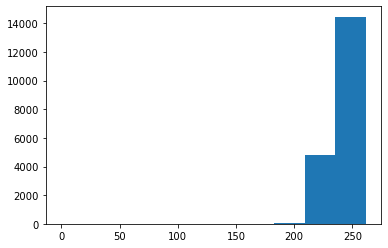

In [19]:
plt.hist(df4['VL2'])

In [20]:
df4[df4['VL2']>230]['VL2'].count()

16707

From the above hist plot it can be said that most of the records i.e 16707 out of 19308(87%) pertaining to feature VL2 are lying in the range of 230 kV to 250 kV.

In [21]:
df4[df4['VL2']==0]['VL2'].count()

6

Six records pertaining to feature VL2 are having values zero, it means either the transmission line is under forced outage due to faults or it can be due to the shutdowm taken for periodic maintainence of line.

In [22]:
df4.loc[df4['VL2']<200,'VL2'].count()

11

 11 records pertaining to feature VL2 are having values less than 200kV. Further, there is an abnormality observed in the data for feature VL2 as the allowed permissible limit for voltage variation for EHV lines(extra high voltage) lies in the range of -12.5 to 10.5.

(array([3.0000e+00, 0.0000e+00, 0.0000e+00, 3.0000e+00, 2.0000e+00,
        0.0000e+00, 0.0000e+00, 3.1000e+01, 4.8240e+03, 1.4445e+04]),
 array([  0.  ,  26.13,  52.26,  78.39, 104.52, 130.65, 156.78, 182.91,
        209.04, 235.17, 261.3 ]),
 <BarContainer object of 10 artists>)

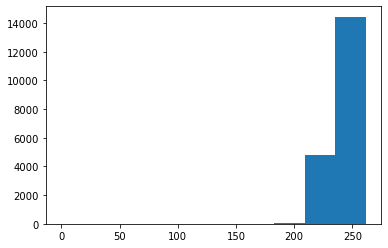

In [23]:
plt.hist(df4['VL3'])

In [24]:
df4[df4['VL3']>230]['VL3'].count()

16822

From the above hist plot it can be said that most of the records i.e 16822 out of 19308(87%) pertaining to feature VL3 are lying in the range of 230 kV to 250 kV.

In [25]:
df4[df4['VL3']==0]['VL2'].count()

3

Three records pertaining to feature VL3 are having values zero, it means either the transmission line is under forced outage due to faults or it can be due to the shutdowm taken for periodic maintainence of line.

In [26]:
df4.loc[df4['VL3']<200,'VL3'].count()

11

11 records pertaining to feature VL3 are having values less than 200kV. Further, there is an abnormality observed in the data for feature VL2 as the allowed permissible limit for voltage variation for EHV lines(extra high voltage) lies in the range of -12.5 to 10.5.

(array([1739., 2726., 4735., 3941., 2643., 1808., 1144.,  422.,  118.,
          32.]),
 array([  0.  ,  22.41,  44.82,  67.23,  89.64, 112.05, 134.46, 156.87,
        179.28, 201.69, 224.1 ]),
 <BarContainer object of 10 artists>)

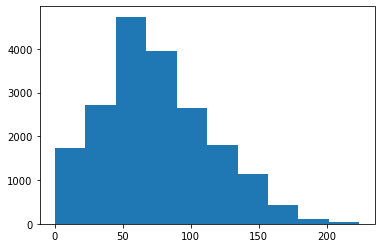

In [27]:
plt.hist(df4['IL1'])

In [28]:
df4[df4['IL1']==0]['IL1'].count()

1574

# There are 1574 records pertaining to IL1 having values zero. Further, there are abnormality observed in the data as there is a mismatch between generation and demand and such type of situation hardly exists where demand is zero resulting into IL1 zero.

# Second scenario can be there is an open circuit which implies the conductor used for carrying current is broken from somewhere which is an ideal situation.

In [29]:
df4[df4['IL1']<100]['IL1'].count()

14453

# 14453 records out of 19308(75%) for feature IL1 are having values less than 100 A(ampere) which says that the transmission line is lightly loaded.

(array([3.624e+03, 6.158e+03, 4.073e+03, 2.270e+03, 1.606e+03, 1.098e+03,
        3.880e+02, 7.700e+01, 8.000e+00, 6.000e+00]),
 array([  0.  ,  25.36,  50.72,  76.08, 101.44, 126.8 , 152.16, 177.52,
        202.88, 228.24, 253.6 ]),
 <BarContainer object of 10 artists>)

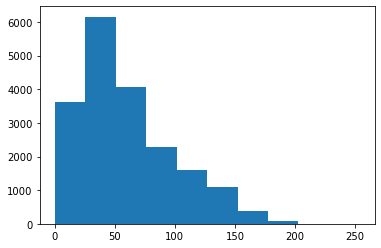

In [30]:
plt.hist(df4['IL2'])

In [31]:
df4[df4['IL2']==0]['IL2'].count()

1663

 There are 1663 records pertaining to IL2 having values zero. Further, there are abnormality observed in the data as there is a mismatch between generation and demand and such type of situation hardly exists where demand is zero resulting into IL2 zero.

In [32]:
df4[df4['IL2']<100]['IL2'].count()

16002

16002 records out of 19308(83%) for feature IL2 are having values less than 100 A(ampere) which says that the transmission line is lightly loaded.

(array([1737., 1887., 4965., 4084., 2853., 2391., 1026.,  312.,   47.,
           6.]),
 array([  0.  ,  24.73,  49.46,  74.19,  98.92, 123.65, 148.38, 173.11,
        197.84, 222.57, 247.3 ]),
 <BarContainer object of 10 artists>)

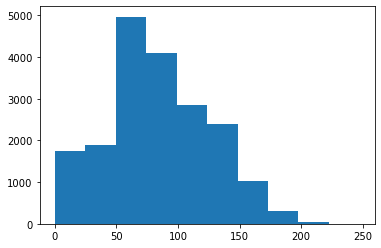

In [33]:
plt.hist(df4['IL3'])

In [34]:
df4[df4['IL3']==0]['IL3'].count()

1662

There are 1662 records pertaining to IL3 having values zero. Further, there are abnormality observed in the data as there is a mismatch between generation and demand and such type of situation hardly exists where demand is zero resulting into IL3 zero.

In [35]:
df4[df4['IL3']<100]['IL3'].count()

12799

12799 records out of 19308(66%) for feature IL3 are having values less than 100 A(ampere) which says that the transmission line is lightly loaded.

(array([1.7300e+03, 4.0000e+00, 0.0000e+00, 0.0000e+00, 3.0000e+00,
        0.0000e+00, 0.0000e+00, 2.7000e+01, 3.2950e+03, 1.4249e+04]),
 array([  0.  ,  44.65,  89.3 , 133.95, 178.6 , 223.25, 267.9 , 312.55,
        357.2 , 401.85, 446.5 ]),
 <BarContainer object of 10 artists>)

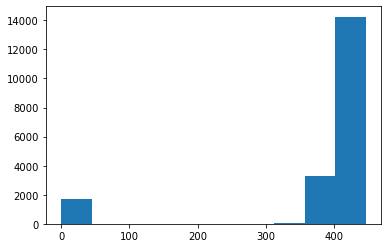

In [36]:
plt.hist(df4['VL12'])

In [37]:
df4[df4['VL12']==0]['VL12'].count()

1730

# There are 1730 records pertaining to VL12 having values zero. Further, there are abnormality observed in the data as VL12 can never be zero (line to line voltage)for healthy power system that too when other parameters of the line like current and voltage(VL23 & VL13) are having some values.

# There can be a scenario where double line(line to line) fault is there which means the conductors of two phase are touching each other which in other words is describe as short circuit of the transmission line.


# L-G(line to ground) fault is the most common fault and 65-70 % percent of faults are of this type.

# 15 to 20% of faults are double line to ground fault.

In [38]:
df4[df4['VL12']<350]['VL12'].count()

1743

# 1743 records pertaining to feature VL12 are having values less than 400kV. Further, there are abnormality observed in the data for feature VL12 as the allowed permissible limit for voltage variation for EHV lines(extra high voltage) lies in the range of -12.5 to 10.5.¶

# The protection system are quite sensitive to the voltage fluctuation say if my voltage goes beyond 350kV and above 420kV the undervoltage and over voltage relay will be operated which in turn will give a signal to circuit breaker to isolate the faulty part.

In [39]:
df4[df4['VL12']>380]['VL12'].count()

17432

# 17432 records out of 19308(90%) for feature VL12 are having values greater than 380kV.

(array([1.729e+03, 0.000e+00, 0.000e+00, 0.000e+00, 3.000e+00, 0.000e+00,
        0.000e+00, 2.900e+01, 2.857e+03, 1.469e+04]),
 array([  0.  ,  44.48,  88.96, 133.44, 177.92, 222.4 , 266.88, 311.36,
        355.84, 400.32, 444.8 ]),
 <BarContainer object of 10 artists>)

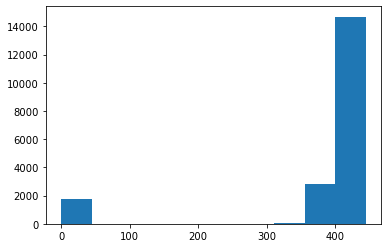

In [40]:
plt.hist(df4['VL23'])

In [41]:
df4[df4['VL23']==0]['VL23'].count()

1729

There are 1730 records pertaining to VL23 having values zero. Further, there are abnormality observed in the data as VL23 can never be zero (line to line voltage)for healthy power system that too when other parameters of the line like current and voltage(VL12 & VL13) are having some values.

In [42]:
df4[df4['VL23']<350]['VL23'].count()

1745

1745 records pertaining to feature VL12 are having values less than 400kV. Further, there are abnormality observed in the data for feature VL23 as the allowed permissible limit for voltage variation for EHV lines(extra high voltage) lies in the range of -12.5 to 10.5.

In [43]:
df4[df4['VL23']>380]['VL23'].count()

17415

17415 records out of 19308(90%) for feature VL23 are having values greater than 380kV.

(array([1.7330e+03, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.5000e+01, 3.2620e+03, 1.4297e+04]),
 array([  0.  ,  44.73,  89.46, 134.19, 178.92, 223.65, 268.38, 313.11,
        357.84, 402.57, 447.3 ]),
 <BarContainer object of 10 artists>)

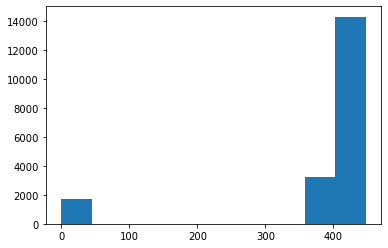

In [44]:
plt.hist(df4['VL31'])

In [45]:
df4[df4['VL31']==0]['VL31'].count()

1732

There are 1732 records pertaining to VL31 having values zero. Further, there are abnormality observed in the data as VL31 can never be zero (line to line voltage)for healthy power system that too when other parameters of the line like current and voltage(VL12 & VL23) are having some values.

In [46]:
df4[df4['VL31']<350]['VL31'].count()

1737

1737 records pertaining to feature VL31 are having values less than 400kV. Further, there are abnormality observed in the data for feature VL31 as the allowed permissible limit for voltage variation for EHV lines(extra high voltage) lies in the range of -12.5 to 10.5.

In [47]:
df4[df4['VL31']>380]['VL31'].count()

17421

17421 records out of 19308(90%) for feature VL31 are having values greater than 380kV.

(array([3.877e+03, 7.688e+03, 5.391e+03, 1.889e+03, 4.000e+02, 5.000e+01,
        1.000e+01, 1.000e+00, 0.000e+00, 2.000e+00]),
 array([  0.  ,  14.58,  29.16,  43.74,  58.32,  72.9 ,  87.48, 102.06,
        116.64, 131.22, 145.8 ]),
 <BarContainer object of 10 artists>)

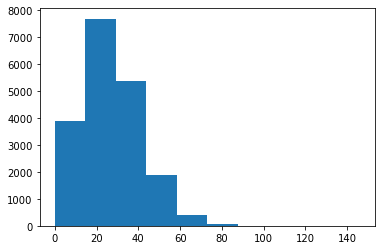

In [48]:
plt.hist(df4['INUT'])

In [49]:
df4[df4['INUT']==0]['INUT'].count()

1653

# There are 1653 records pertaining to INUT are having values zero. During balanced condition there will be no current flowing through the neutral line and hence there is no need of the neutral terminal which is an ideal situation.

# But when there will be unbalanced current flowing in the three phase circuit, neutral is having a vital role. It will take the unbalanced current through to the ground and protect the transformer or other equipment

# Unbalanced currents result in higher operating temperature, shortened motor life, and efficiency reduction.

In [50]:
df4[df4['INUT']>20]['INUT'].count()

12786

# 12876 records out of 19308(67%) for feature INUYT are having values greater than 20A

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 5.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.200e+01, 1.929e+04]),
 array([-0.98 , -0.782, -0.584, -0.386, -0.188,  0.01 ,  0.208,  0.406,
         0.604,  0.802,  1.   ]),
 <BarContainer object of 10 artists>)

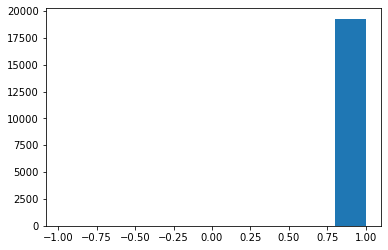

In [51]:
plt.hist(df4['PFL1'])

In [52]:
df4[df4['PFL1']<0.75]['PFL1'].count()

10

# 10 records for feature PFL1 are having values less than 0.75. The power factor above 0.9 is considered as a good power factor.

In [53]:
df4[df4['PFL1']>0.75]['PFL1'].count()

19296

# There are 19296 records for PFL1 where values are greater than 0.75.

(array([1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 5.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 2.00e+00, 1.93e+04]),
 array([-0.96 , -0.764, -0.568, -0.372, -0.176,  0.02 ,  0.216,  0.412,
         0.608,  0.804,  1.   ]),
 <BarContainer object of 10 artists>)

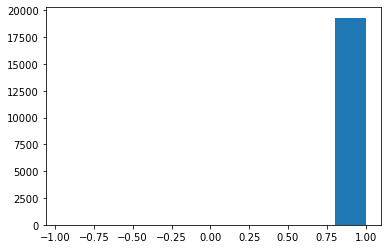

In [54]:
plt.hist(df4['PFL2'])

In [55]:
df4[df4['PFL2']<0.75]['PFL2'].count()

6

6 records for feature PFL2 are having values less than 0.75. The power factor above 0.9 is considered as a good power factor.

In [56]:
df4[df4['PFL2']>0.75]['PFL2'].count()

19301

There are 19301 records for PFL2 where values are greater than 0.75.

(array([1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 5.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 2.00e+00, 1.93e+04]),
 array([-0.95 , -0.755, -0.56 , -0.365, -0.17 ,  0.025,  0.22 ,  0.415,
         0.61 ,  0.805,  1.   ]),
 <BarContainer object of 10 artists>)

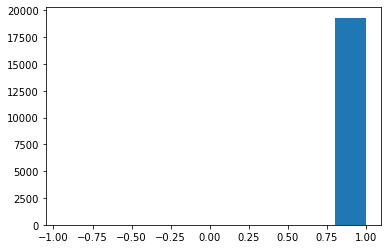

In [57]:
plt.hist(df4['PFL3'])

In [58]:
df4[df4['PFL3']<0.75]['PFL3'].count()

7

 7 records for feature PFL3 are having values less than 0.75. The power factor above 0.9 is considered as a good power factor.

In [59]:
df4[df4['PFL3']>0.75]['PFL3'].count()

19301

There are 19301 records for PFL3 where values are greater than 0.75.

(array([1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 6.00e+00, 1.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 1.93e+04]),
 array([-0.96 , -0.764, -0.568, -0.372, -0.176,  0.02 ,  0.216,  0.412,
         0.608,  0.804,  1.   ]),
 <BarContainer object of 10 artists>)

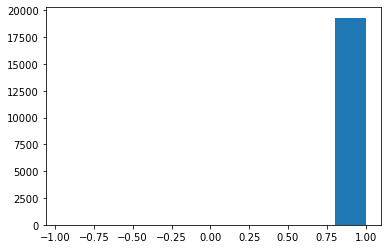

In [60]:
plt.hist(df4['Avg_PF'])

In [61]:
df4[df4['Avg_PF']<0.75]['Avg_PF'].count()

8

There are in total 8 records for which average power factor i.e (PFL1+PFL2+PFL3/3) is less than 0.75.

In [62]:
df4[df4['Avg_PF']>0.75]['Avg_PF'].count()

19300

There are 19300 records for Avg-PF where values are greater than 0.75.

(array([1.0000e+00, 0.0000e+00, 0.0000e+00, 7.8300e+02, 4.7000e+01,
        7.1000e+01, 6.3700e+02, 6.4000e+01, 1.6653e+04, 1.0520e+03]),
 array([-164.4 , -144.44, -124.48, -104.52,  -84.56,  -64.6 ,  -44.64,
         -24.68,   -4.72,   15.24,   35.2 ]),
 <BarContainer object of 10 artists>)

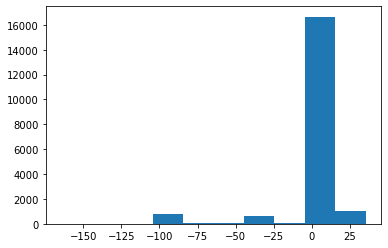

In [63]:
plt.hist(df4['Sum_PF'])

In [64]:
df4[df4['Sum_PF']<0]['Sum_PF'].count()

1609

# There are 1609 records having negative values for feature sum_pf.

In [65]:
df4[df4['Sum_PF']>0]['Sum_PF'].count()

17694

# There are 17694 records having positive values for feature sum_pf.

# There is an no such term as summation of pf i.e sum_pf in power system. There is a term called as average pf for measuring the average pf of three individual lines.

# The feature sum_df can be dropped as it is not important for further analysis.

(array([5.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.9303e+04]),
 array([ 0.  ,  5.02, 10.04, 15.06, 20.08, 25.1 , 30.12, 35.14, 40.16,
        45.18, 50.2 ]),
 <BarContainer object of 10 artists>)

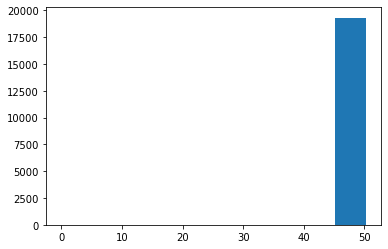

In [66]:
plt.hist(df4['FRQ'])

In [67]:
df4[df4['FRQ']>49]['FRQ'].count()

19303

# 19303 records out of 19308 are having values greater than 49 HZ for feature FRQ.

# Standard frequency is 50 Hz for indian condition.

# Frequency variation of +2.5 on higher side and -2.5 on lower side is allowed. There are underfrequency as well as over frequency relays which operates if the frequency variation goes beyond allowed permissible limit and trips the line.

# Active power(Useful power)  will decide the frequency.Let's say for example during night hours load is quite less as industrial and commercial establishments are closed so the frequency will shoot up as active power available in the system is more and vice versa.

# Frequency variation is one of the important parameters which needs to be taken very seriously as it can trip the entire generation plant if it breaches allowed permissible limit and entire nation can go in dark. 

In [68]:
df4[df4['FRQ']==0]['FRQ'].count()

5

# 5 records are having values as zero for feature FRQ which says no electricity is generated during that time frame.

# Scenarios can be the genearting plant is under maintainence or it has tripped due to some external faults.

(array([7.000e+01, 3.047e+03, 7.556e+03, 6.007e+03, 2.289e+03, 2.440e+02,
        5.000e+01, 3.300e+01, 1.000e+01, 2.000e+00]),
 array([0.  , 0.62, 1.24, 1.86, 2.48, 3.1 , 3.72, 4.34, 4.96, 5.58, 6.2 ]),
 <BarContainer object of 10 artists>)

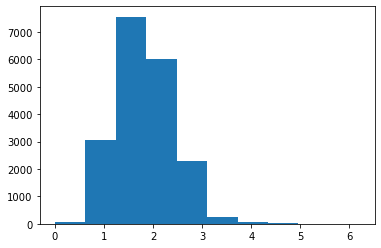

In [69]:
plt.hist(df4['THDVL1'])

In [70]:
df4[df4['THDVL1']<3]['THDVL1'].count()

18879

# 18879 records are having values less than 3% for THDVL1.

# In an electric power system, a harmonic of a voltage or current waveform is a sinusoidal wave whose frequency is an integer multiple of the fundamental frequency. 

# Harmonic frequencies are produced by the action of non-linear loads such as rectifiers, discharge lighting,computer,diode,bulbs or saturated electric machines. 

# They are a frequent cause of power quality problems and can result in increased equipment and conductor heating and can damage it.

# Total Harmonic Voltage Distortion or THD, of a signal is a measurement of the harmonic distortion present and is defined as the ratio of the sum of the power of all harmonic components to the power of the fundamental frequency

# It can be expressed in percentage or decibel , lesser the value better it is.

# Allowed permissible limit for THD specifically for voltage  is 1.5 to 3%.

In [71]:
df4[df4['THDVL1']>3]['THDVL1'].count()

339

# The abnormality is observed in 339 records where THDVL1 is exceeding the permissible limit.

(array([6.500e+01, 3.182e+03, 9.255e+03, 4.706e+03, 1.879e+03, 1.310e+02,
        5.200e+01, 2.800e+01, 7.000e+00, 3.000e+00]),
 array([0.  , 0.65, 1.3 , 1.95, 2.6 , 3.25, 3.9 , 4.55, 5.2 , 5.85, 6.5 ]),
 <BarContainer object of 10 artists>)

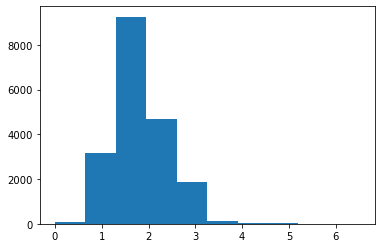

In [72]:
plt.hist(df4['THDVL2'])

In [73]:
df4[df4['THDVL2']<3]['THDVL2'].count()

18694

# 18694 records are having values less than 3% for THDVL2.

In [74]:
df4[df4['THDVL2']>3]['THDVL2'].count()

364

The abnormality is observed in 364 records where THDVL2 is exceeding the permissible limit.

(array([5.700e+01, 2.925e+03, 7.857e+03, 6.365e+03, 1.831e+03, 1.670e+02,
        6.800e+01, 2.800e+01, 9.000e+00, 1.000e+00]),
 array([0.  , 0.63, 1.26, 1.89, 2.52, 3.15, 3.78, 4.41, 5.04, 5.67, 6.3 ]),
 <BarContainer object of 10 artists>)

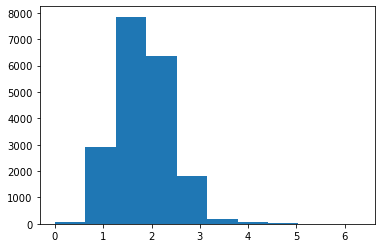

In [75]:
plt.hist(df4['THDVL3'])

In [76]:
df4[df4['THDVL3']<3]['THDVL3'].count()

18682

# 18682 records are having values less than 3% for THDVL3.

In [77]:
df4[df4['THDVL3']>3]['THDVL3'].count()

369

The abnormality is observed in 369 records where THDVL3 is exceeding the permissible limit.

(array([1839., 2175., 2970., 4280., 3202., 1971., 1770.,  925.,  164.,
          12.]),
 array([ 0.  ,  3.06,  6.12,  9.18, 12.24, 15.3 , 18.36, 21.42, 24.48,
        27.54, 30.6 ]),
 <BarContainer object of 10 artists>)

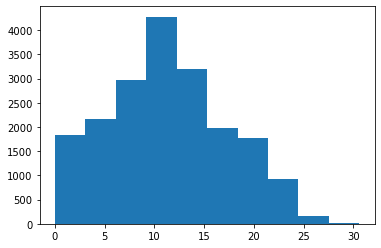

In [78]:
plt.hist(df4['THDIL1'])

In [79]:
df4[df4['THDIL1']<10]['THDIL1'].count()

8039

# 8039 records are having values less than 10% for THDIL1

# Allowed permissible limit for THD specifically for current  is 8 to 10% and anything above that is abnormal or dangerous.

(array([3.142e+03, 8.868e+03, 5.229e+03, 1.978e+03, 8.500e+01, 5.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ 0.  ,  6.59, 13.18, 19.77, 26.36, 32.95, 39.54, 46.13, 52.72,
        59.31, 65.9 ]),
 <BarContainer object of 10 artists>)

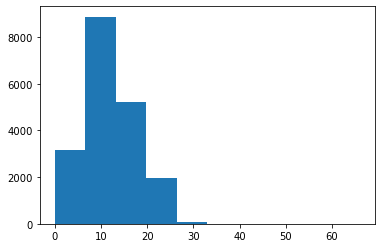

In [80]:
plt.hist(df4['THDIL2'])

In [81]:
df4[df4['THDIL2']<10]['THDIL2'].count()

7887

 7887 records are having values less than 10% for THDIL2.

(array([1.730e+03, 4.672e+03, 6.451e+03, 3.370e+03, 1.886e+03, 1.045e+03,
        1.470e+02, 4.000e+00, 1.000e+00, 2.000e+00]),
 array([ 0.  ,  3.31,  6.62,  9.93, 13.24, 16.55, 19.86, 23.17, 26.48,
        29.79, 33.1 ]),
 <BarContainer object of 10 artists>)

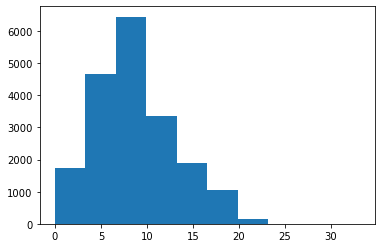

In [82]:
plt.hist(df4['THDIL3'])

In [83]:
df4[df4['THDIL3']<10]['THDIL3'].count()

12853

 12853 records are having values less than 10% for THDIL3.

(array([4.050e+02, 4.000e+00, 3.190e+02, 1.506e+03, 4.436e+03, 1.531e+03,
        3.530e+03, 4.810e+02, 6.562e+03, 5.340e+02]),
 array([  0. ,  23.4,  46.8,  70.2,  93.6, 117. , 140.4, 163.8, 187.2,
        210.6, 234. ]),
 <BarContainer object of 10 artists>)

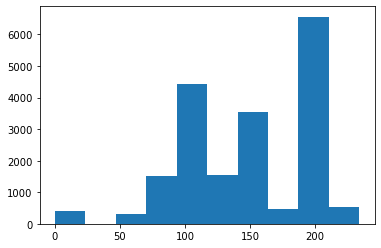

In [84]:
 plt.hist(df4['MDIL1'])

In [85]:
df4[df4['MDIL1']>100]['MDIL1'].count()

15858

# 15858 records are having values greater than 100 MVA for feature MDIL1(Maximum Demand for line 1).¶

# The maximum loading of a transmission line for 400kV is governed by surge impedance loading of a line. Further, surge impedance loading of 400 kV transmission line is 400 ohms.

# The main objective of power system is that the sending end voltage should be equal to receiving end voltage and that is governed by surge impedance loading in other words it is nothing but a safe loading of a transmission line.

# The transmission line has two components inductor in series and shunt capacitor in parallel. The inductor is said to be absorber of reactive power and shunt capacitor is said to generator of reactive power.

# The amount of reactive power generated by capacitor should be absorbed by series inductor which is an ideal situation.

# Pratically depending on the load say if the load is less then reactive power absorption is less resulting into voltage at receiving end greater than sending voltage which is called as ferranti effect and it generally happens during night hours and vice versa.

In [86]:
df4[df4['MDIL1']<100]['MDIL1'].count()

3450

# 3450 records are having values less than 100 MVA for feature MDIL1 so it is a case of transmission line which is lightly loaded.

# Practically speaking the above situation should not occur as it will result into higher voltage at the receiving end so this kind of abnormality should be higlighted and cross checked.

In [92]:
df4[df4['MDIL1']==0]['MDIL1'].count()

52

# 52 records are having MDIL1 feature values as zero which says the transmission line is either tripped due to fault or it can be under scheduled maintainence for that time frame.

(array([1718.,  258., 1382., 1234., 4477., 2362., 1230., 3562., 1033.,
        2052.]),
 array([  0.  ,  23.47,  46.94,  70.41,  93.88, 117.35, 140.82, 164.29,
        187.76, 211.23, 234.7 ]),
 <BarContainer object of 10 artists>)

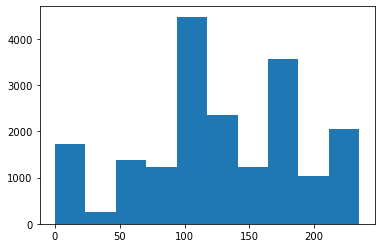

In [88]:
plt.hist(df4['MDIL2'])

In [90]:
df4[df4['MDIL2']>100]['MDIL2'].count()

14193

 14193 records are having values greater than 100 MVA for feature MDIL2(Maximum Demand for line 2).

In [91]:
df4[df4['MDIL2']<100]['MDIL2'].count()

5115

5115 records are having values less than 100 MVA for feature MDIL2 so it is a case of transmission line which is lightly loaded.

In [101]:
df4[df4['MDIL2']==0]['MDIL2'].count()

1673

1673 records are having MDIL2 feature values as zero which says the transmission line is either tripped due to fault or it can be under scheduled maintainence for that time frame.

(array([1718.,    0.,  116.,  242.,  700.,  999., 4869., 3365., 4504.,
        2795.]),
 array([  0.  ,  23.05,  46.1 ,  69.15,  92.2 , 115.25, 138.3 , 161.35,
        184.4 , 207.45, 230.5 ]),
 <BarContainer object of 10 artists>)

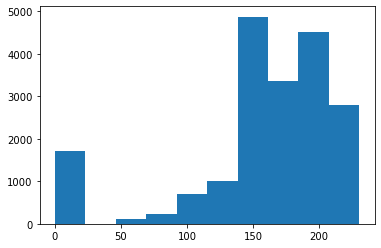

In [95]:
plt.hist(df4['MDIL3'])

In [96]:
df4[df4['MDIL3']>100]['MDIL3'].count()

16997

 16997 records are having values greater than 100 MVA for feature MDIL3(Maximum Demand for line 3).

In [98]:
df4[df4['MDIL3']<100]['MDIL3'].count()

2311

2311 records are having values less than 100 MVA for feature MDIL3 so it is a case of transmission line which is lightly loaded.

In [100]:
df4[df4['MDIL3']==0]['MDIL3'].count()

1673

# 1673 records are having MDIL3 feature values as zero which says the transmission line is either tripped due to fault or it can be under scheduled maintainence for that time frame.

# Bi variate analysis

<AxesSubplot:xlabel='VL1', ylabel='PFL1'>

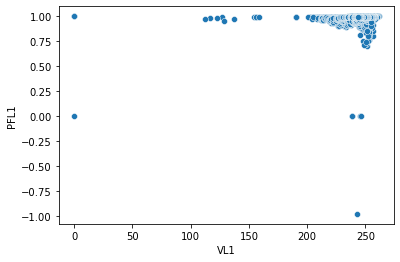

In [103]:
sns.scatterplot(x='VL1',y='PFL1',data=df4)

# When PFLI is zero VL1 should be zero which is correct as per the above scatter plot.

# There can never be a case where PFLI is 1  for VL1 zero and vice versa so such of abnormalities is to be verified/highlighted.

# As such no relationship can be established between feature VL1 and PFL1.

<AxesSubplot:xlabel='VL2', ylabel='PFL1'>

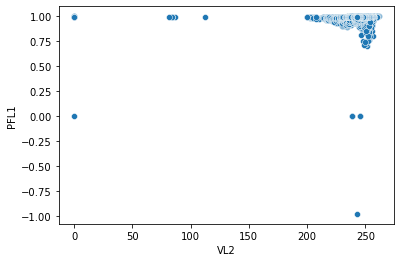

In [104]:
sns.scatterplot(x='VL2',y='PFL1',data=df4)

When PFLI is zero VL2 should be zero which is correct as per the above scatter plot.

There can never be a case where PFLI is 1 for VL2 zero and vice versa so such of abnormalities is to be verified/highlighted.

As such no relationship can be established between feature VL2 and PFIL1.

# Most of the records for feature VL2 lies in the range of 200 to 250 kV for a given PFL1 between 0.75 to 1.

<AxesSubplot:xlabel='VL3', ylabel='PFL1'>

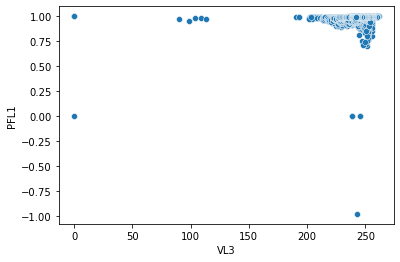

In [105]:
sns.scatterplot(x='VL3',y='PFL1',data=df4)

When PFLI is zero VL3 should be zero which is correct as per the above scatter plot.

There can never be a case where PFLI is 1 for VL3 zero and vice versa so such of abnormalities is to be verified/highlighted.

As such no relationship can be established between feature VL3 and PFIL1.

<AxesSubplot:xlabel='IL1', ylabel='PFL1'>

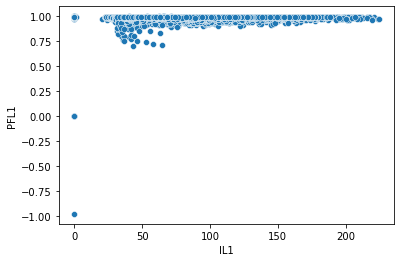

In [107]:
sns.scatterplot(x='IL1',y='PFL1',data=df4)

# When PFLI is zero IL1 should be zero which is correct as per the above scatter plot.

# There can never be a case where PFL1 is 1 or -1  for IL1 zero so such of abnormalities is to be verified/highlighted.

# Most of the records for IL1 lies in the range of 50 to 200 A for a given PFL1 between 0.75 to 1.

As such no relationship can be established between feature IL1 and PFIL1.

<AxesSubplot:xlabel='IL2', ylabel='PFL1'>

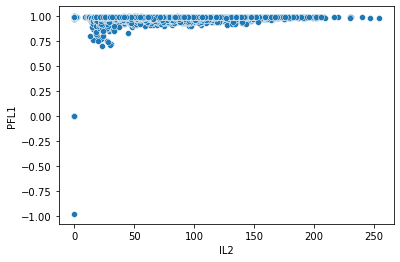

In [110]:
sns.scatterplot(x='IL2',y='PFL1',data=df4)

When PFLI is zero IL2 should be zero which is correct as per the above scatter plot.

There can never be a case where PFL1 is 1 or -1 for IL2 zero so such of abnormalities is to be verified/highlighted.

Most of the records for IL2 lies in the range of 50 to 250 A for a given PFL1 between 0.75 to 1.

In [ ]:
As such no relationship can be established between feature IL2 and PFIL1.

<AxesSubplot:xlabel='IL3', ylabel='PFL1'>

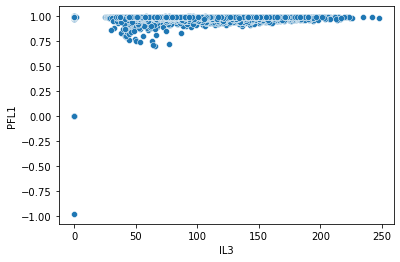

In [113]:
sns.scatterplot(x='IL3',y='PFL1',data=df4)

When PFLI is zero IL3 should be zero which is correct as per the above scatter plot.

There can never be a case where PFL1 is 1 or -1 for IL3 zero so such of abnormalities is to be verified/highlighted.

Most of the records for IL3 lies in the range of 50 to 250 A for a given PFL1 between 0.75 to 1.

In [ ]:
As such no relationship can be established between feature IL3 and PFIL1.

<AxesSubplot:xlabel='VL12', ylabel='PFL1'>

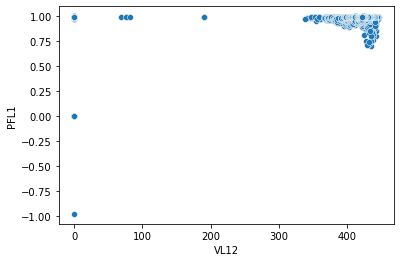

In [114]:
sns.scatterplot(x='VL12',y='PFL1',data=df4)

When PFLI is zero Vl12 should be zero which is correct as per the above scatter plot.

There can never be a case where PFL1 is 1 or -1 for VL12 zero so such of abnormalities is to be verified/highlighted.

# Most of the records for VL12 lies in the range of 360 kV to 440 kV for a given PFL1 between 0.75 to 1.

# There are least records for VL12 with a values less than 300 kV  which is well beyond allowed permissible limit.

As such no relationship can be established between feature VL12 and PFIL1.

<AxesSubplot:xlabel='VL23', ylabel='PFL1'>

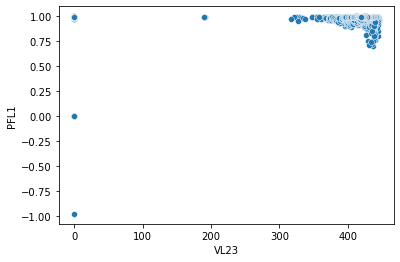

In [115]:
sns.scatterplot(x='VL23',y='PFL1',data=df4)

When PFLI is zero Vl23 should be zero which is correct as per the above scatter plot.

There can never be a case where PFL1 is 1 or -1 for VL23 zero so such of abnormalities is to be verified/highlighted.

Most of the records for VL23 lies in the range of 330 kV to 440 kV for a given PFL1 between 0.75 to 1.

# There are least records for VL23 with a values less than 200kV which is well beyond allowed permissible limit.

As such no relationship can be established between feature VL23 and PFIL1.

<AxesSubplot:xlabel='VL31', ylabel='PFL1'>

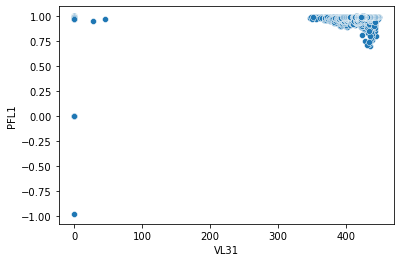

In [117]:
sns.scatterplot(x='VL31',y='PFL1',data=df4)

When PFLI is zero VL31 should be zero which is correct as per the above scatter plot.

There can never be a case where PFL1 is 1 or -1 for VL31 zero so such of abnormalities is to be verified/highlighted.

Most of the records for VL31 lies in the range of 350 kV to 440 kV for a given PFL1 between 0.75 to 1.

# There are least records for VL31 with a values less than 100kV which is well beyond allowed permissible limit.

<AxesSubplot:xlabel='INUT', ylabel='PFL1'>

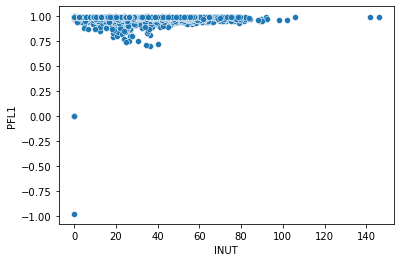

In [120]:
sns.scatterplot(x='INUT',y='PFL1',data=df4)

When PFLI is zero INUT should be zero which is correct as per the above scatter plot.

There can never be a case where PFL1 is 1 or -1 for INUT zero so such of abnormalities is to be verified/highlighted.

# Most of the records for INUT lies in the range of 0 A to 90 A for a given PFL1 between 0.75 to 1.

As such no relationship can be established between INUT and PFL1.

<AxesSubplot:xlabel='PFL2', ylabel='PFL1'>

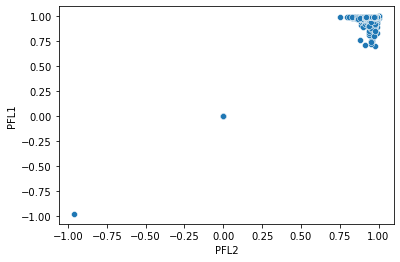

In [122]:
sns.scatterplot(x='PFL2',y='PFL1',data=df4)

When PFLI is zero PFL2 should be zero which is correct as per the above scatter plot.

# Most of the records for PFL2 lies in the range of 0.75 to 1 for a given PFL1 between 0.75 to 1.

As such no relationship can be established between PFL2 and PFL1.

<AxesSubplot:xlabel='PFL3', ylabel='PFL1'>

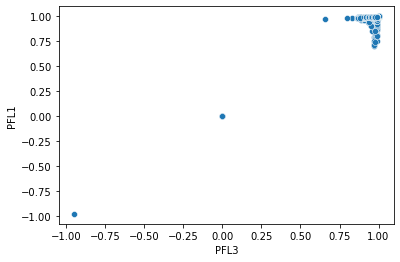

In [124]:
sns.scatterplot(x='PFL3',y='PFL1',data=df4)

When PFLI is zero PFL3 should be zero which is correct as per the above scatter plot.

# Most of the records for PFL3 lies in the range of 0.75 to 1 for a given PFL1 between 0.75 to 1.

As such no relationship can be established between PFL3 and PFL1.

<AxesSubplot:xlabel='Avg_PF', ylabel='PFL1'>

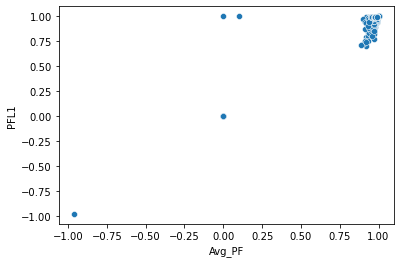

In [125]:
sns.scatterplot(x='Avg_PF',y='PFL1',data=df4)

When PFLI is zero Avg_PF should be zero which is correct as per the above scatter plot.

# There can never be case where PFL1 is one and corresponding Avg_PF is zero,so such of abnormalities is to be verified/highlighted.

 Most of the records for Avg_pf lies in the range of 0.75 to 1 for a given PFL1 between 0.75 to 1.

<AxesSubplot:xlabel='Sum_PF', ylabel='PFL1'>

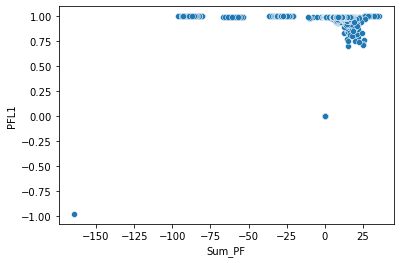

In [127]:
sns.scatterplot(x='Sum_PF',y='PFL1',data=df4)

As such no relationship can be established between Sum_PF and PFL1.

<AxesSubplot:xlabel='FRQ', ylabel='PFL1'>

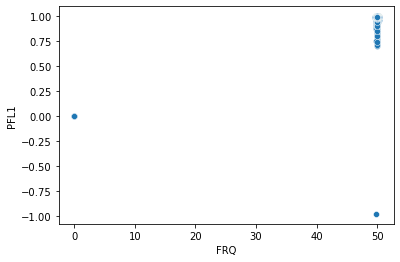

In [128]:
sns.scatterplot(x='FRQ',y='PFL1',data=df4)

When FRQ is zero PFL1 should be zero which is correct as per the above scatter plot.

 Most of the records for FRQ lies in the range of 49 to 50 Hz for a given PFL1 between 0.75 to 1.

As such no relationship can be established between FRQ and PFL1.

<AxesSubplot:xlabel='THDVL1', ylabel='PFL1'>

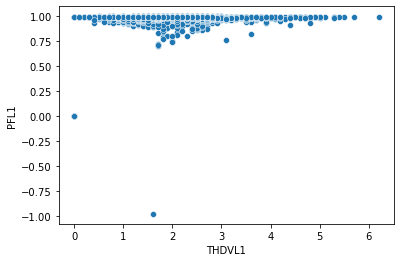

In [131]:
 sns.scatterplot(x='THDVL1',y='PFL1',data=df4)

When THDVL1 is zero PFL1 should be zero which is correct as per the above scatter plot.

# Most of the records for THDVL1 lies in the range of 1 to 3%  for a given PFL1 between 0.75 to 1 which is well within permissible limit of 1.5% to 3%.

As such no relationship can be established between THDVL1 and PFL1.

<AxesSubplot:xlabel='THDVL2', ylabel='PFL1'>

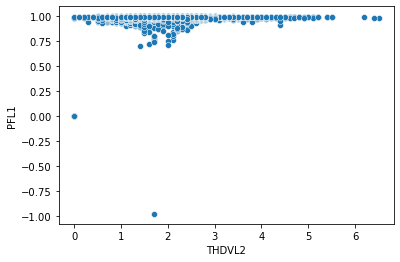

In [133]:
 sns.scatterplot(x='THDVL2',y='PFL1',data=df4)

When THDVL2 is zero PFL1 should be zero which is correct as per the above scatter plot.

Most of the records for THDVL2 lies in the range of 1 to 3%  for a given PFL1 between 0.75 to 1 which is well within permissible limit of 1.5% to 3%.

As such no relationship can be established between THDVL2 and PFL1.

<AxesSubplot:xlabel='THDVL3', ylabel='PFL1'>

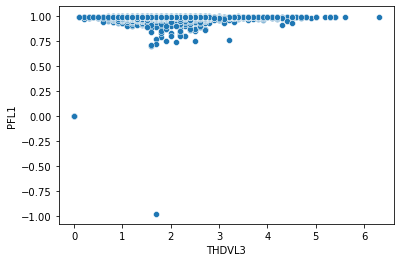

In [134]:
 sns.scatterplot(x='THDVL3',y='PFL1',data=df4)

When THDVL3 is zero PFL1 should be zero which is correct as per the above scatter plot.

Most of the records for THDVL3 lies in the range of 1 to 3%  for a given PFL1 between 0.75 to 1 which is well within permissible limit of 1.5% to 3%.

As such no relationship can be established between THDVL3 and PFL1.

<AxesSubplot:xlabel='THDIL1', ylabel='PFL1'>

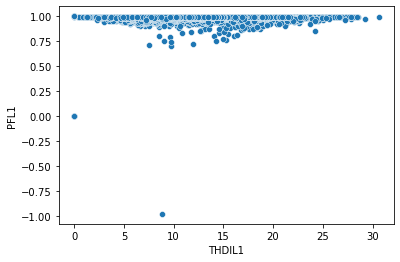

In [136]:
 sns.scatterplot(x='THDIL1',y='PFL1',data=df4)

When THDIL1 is zero PFL1 should be zero which is correct as per the above scatter plot.

Most of the records for THDIL1 lies in the range of 5 to 15%  for a given PFL1 between 0.75 to 1 .

# The permissible limit for THDIL1 is 6 % to 8% and anything over 10% is considered as abnormal which needs to be verified/highlighted.

As such no relationship can be established between THDIL1 and PFL1.

<AxesSubplot:xlabel='THDIL2', ylabel='PFL1'>

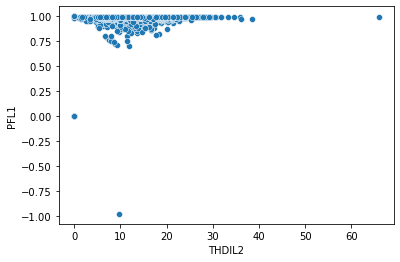

In [137]:
 sns.scatterplot(x='THDIL2',y='PFL1',data=df4)

When THDIL2 is zero PFL1 should be zero which is correct as per the above scatter plot.

Most of the records for THDIL2 lies in the range of 5 to 15%  for a given PFL1 between 0.75 to 1 .

The permissible limit for THDIL2 is 6 % to 8% and anything over 10% is considered as abnormal which needs to be verified/highlighted.

As such no relationship can be established between THDIL2 and PFL1.

<AxesSubplot:xlabel='THDIL3', ylabel='PFL1'>

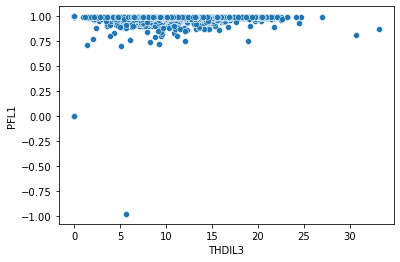

In [138]:
 sns.scatterplot(x='THDIL3',y='PFL1',data=df4)

When THDIL3 is zero PFL1 should be zero which is correct as per the above scatter plot.

Most of the records for THDIL3 lies in the range of 5 to 15%  for a given PFL1 between 0.75 to 1 .

<AxesSubplot:xlabel='MDIL1', ylabel='PFL1'>

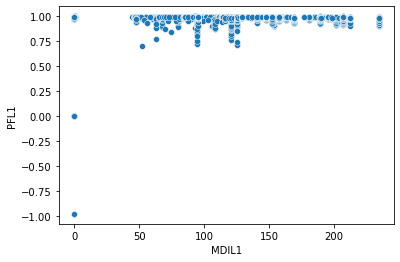

In [139]:
 sns.scatterplot(x='MDIL1',y='PFL1',data=df4)

When MDIL1 is zero PFL1 should be zero which is correct as per the above scatter plot.

# There cannot be a case where MDIL1 is zero and PFIL1 is -1 or 1 so such abnormalities is to be verified/Highlighted.

Most of the records for MDIL1 lies in the range of 50 MVA to 150MVA  for a given PFL1 between 0.75 to 1 .

As such no relationship can be established between MDIL1 and PFL1.

<AxesSubplot:xlabel='MDIL2', ylabel='PFL1'>

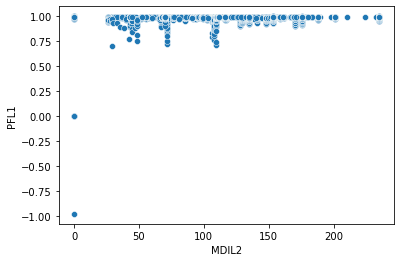

In [140]:
 sns.scatterplot(x='MDIL2',y='PFL1',data=df4)

When MDIL2 is zero PFL1 should be zero which is correct as per the above scatter plot.

Most of the records for MDIL2 lies in the range of 50 MVA to 150MVA  for a given PFL1 between 0.75 to 1 .

As such no relationship can be established between MDIL2 and PFL1.

<AxesSubplot:xlabel='MDIL3', ylabel='PFL1'>

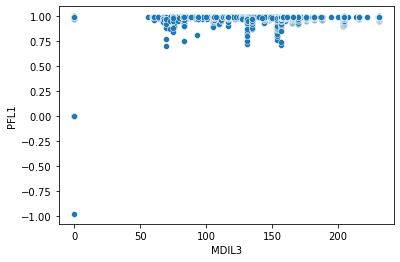

In [141]:
 sns.scatterplot(x='MDIL3',y='PFL1',data=df4)

When MDIL3 is zero PFL1 should be zero which is correct as per the above scatter plot.

Most of the records for MDIL3 lies in the range of 50 MVA to 150MVA for a given PFL1 between 0.75 to 1 

As such no relationship can be established between MDIL3 and PFL1.

<Figure size 864x720 with 0 Axes>

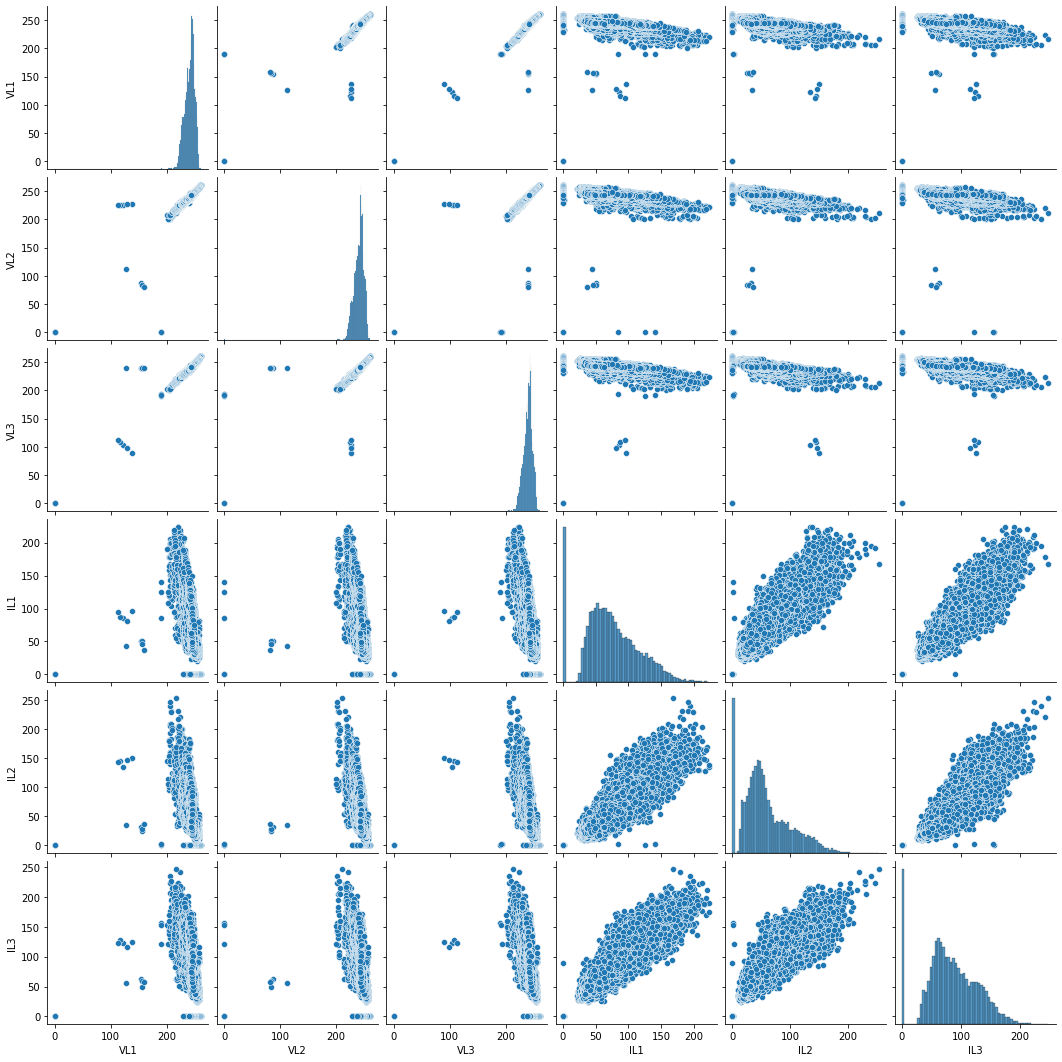

In [146]:
plt.figure(figsize=[12,10])
sns.pairplot(df4[['VL1','VL2','VL3','IL1','IL2','IL3']])
plt.show()

# From the above pairplot it can be said there is a positive linear relationship between IL1 aand IL2 and IL1 and IL3 which is true as the current increases in one of the line correspondingly the same increase should be reflected in other lines.

# Correspondingly there is a positive linear relationship between IL2 and IL3 and IL2 and IL1 and similarity between IL3 and IL1 and IL3 and IL2.

# From the above pairplot it can be said there is a negative relationship between features VL1 and IL1, VL1 and IL2, VL1 and IL3 which is true, as the voltage increases the current should decrease as the power transmitted remains constant.

# There is a positive linear relationship between features VL1 and VL2, VL1 and VL3.

# On similar grounds we can compare realtionship between other features also. 

VL1           AxesSubplot(0.125,0.71587;0.0824468x0.16413)
VL2        AxesSubplot(0.223936,0.71587;0.0824468x0.16413)
VL3        AxesSubplot(0.322872,0.71587;0.0824468x0.16413)
IL1        AxesSubplot(0.421809,0.71587;0.0824468x0.16413)
IL2        AxesSubplot(0.520745,0.71587;0.0824468x0.16413)
IL3        AxesSubplot(0.619681,0.71587;0.0824468x0.16413)
VL12       AxesSubplot(0.718617,0.71587;0.0824468x0.16413)
VL23       AxesSubplot(0.817553,0.71587;0.0824468x0.16413)
VL31         AxesSubplot(0.125,0.518913;0.0824468x0.16413)
INUT      AxesSubplot(0.223936,0.518913;0.0824468x0.16413)
PFL1      AxesSubplot(0.322872,0.518913;0.0824468x0.16413)
PFL2      AxesSubplot(0.421809,0.518913;0.0824468x0.16413)
PFL3      AxesSubplot(0.520745,0.518913;0.0824468x0.16413)
Avg_PF    AxesSubplot(0.619681,0.518913;0.0824468x0.16413)
Sum_PF    AxesSubplot(0.718617,0.518913;0.0824468x0.16413)
FRQ       AxesSubplot(0.817553,0.518913;0.0824468x0.16413)
THDVL1       AxesSubplot(0.125,0.321957;0.0824468x0.1641

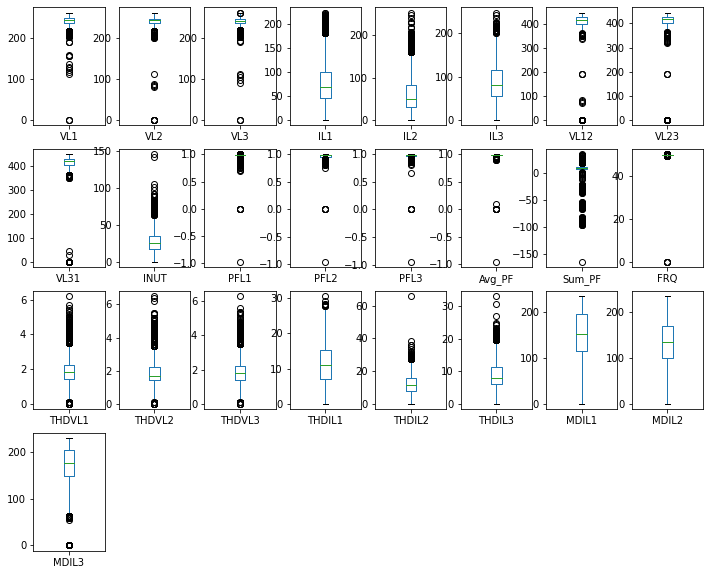

In [163]:
df4.plot(kind='box',figsize=[12,10],subplots=True,layout=[4,8])

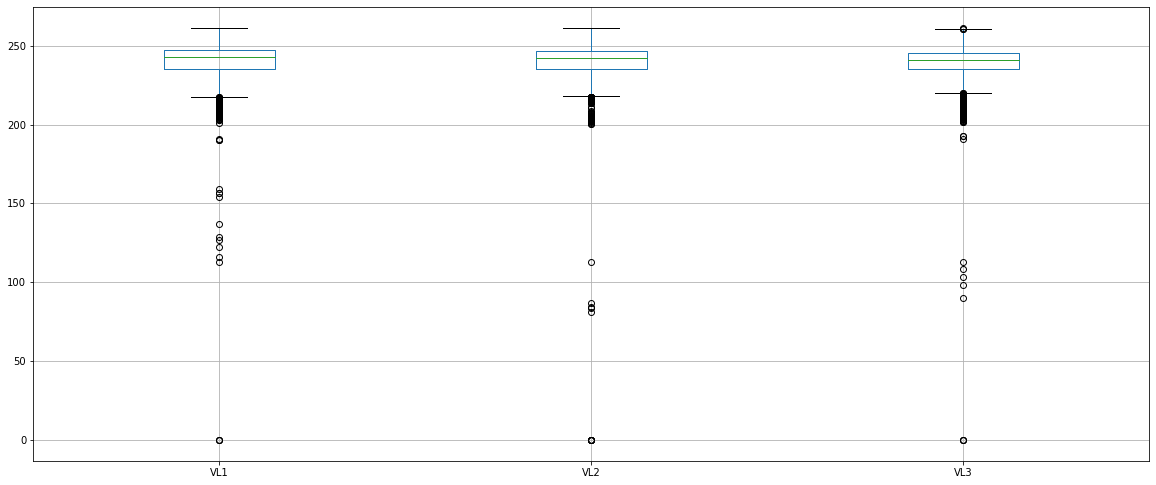

In [181]:
df4.iloc[:,0:3].boxplot(figsize=[20,10])
plt.subplots_adjust(bottom=0.25)
plt.show()

# There are outliers present in features VL1,VL2 and VL3.

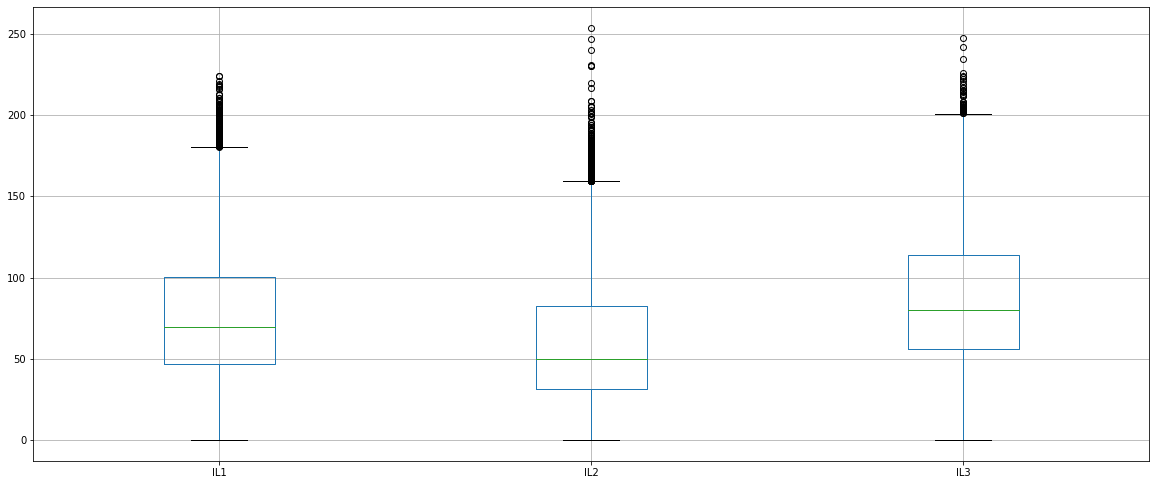

In [182]:
df4.iloc[:,3:6].boxplot(figsize=[20,10])
plt.subplots_adjust(bottom=0.25)
plt.show()

# There are outliers present in features IL1, IL2 and IL3.

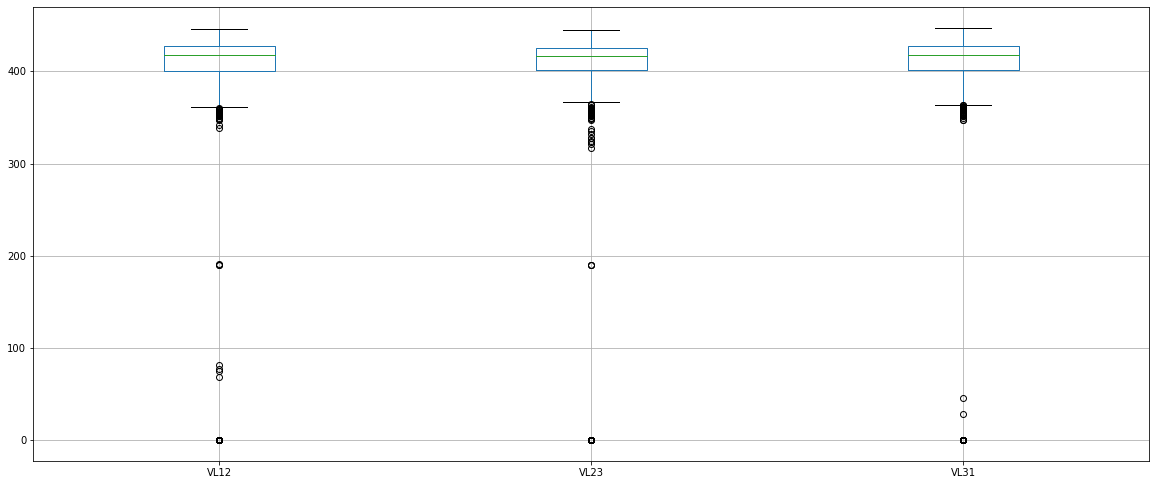

In [183]:
df4.iloc[:,6:9].boxplot(figsize=[20,10])
plt.subplots_adjust(bottom=0.25)
plt.show()

# There are outliers present in features VL12,VL23 and VL31.

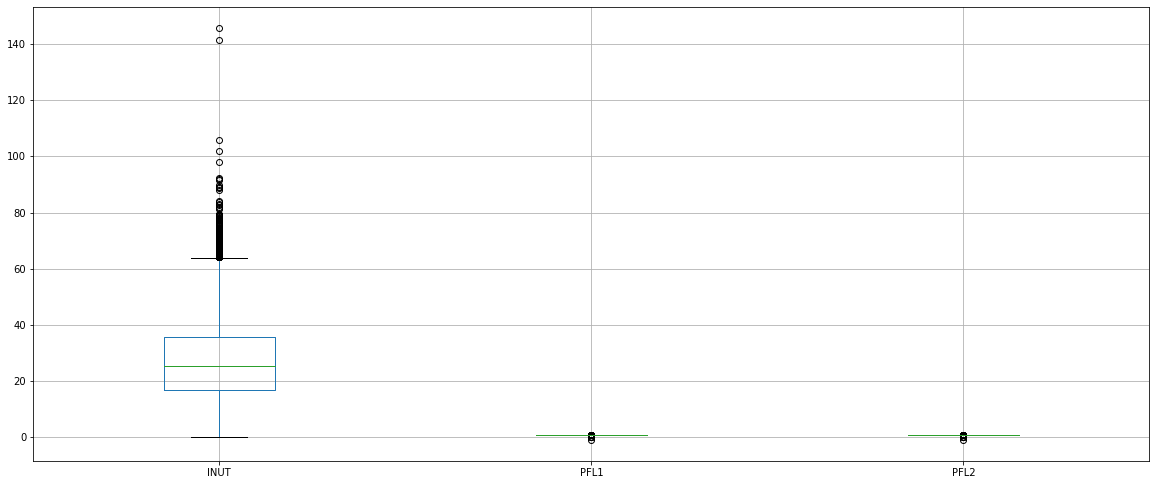

In [184]:
df4.iloc[:,9:12].boxplot(figsize=[20,10])
plt.subplots_adjust(bottom=0.25)
plt.show()

# There are outliers present in features INUT,PFL1 and PFL2.

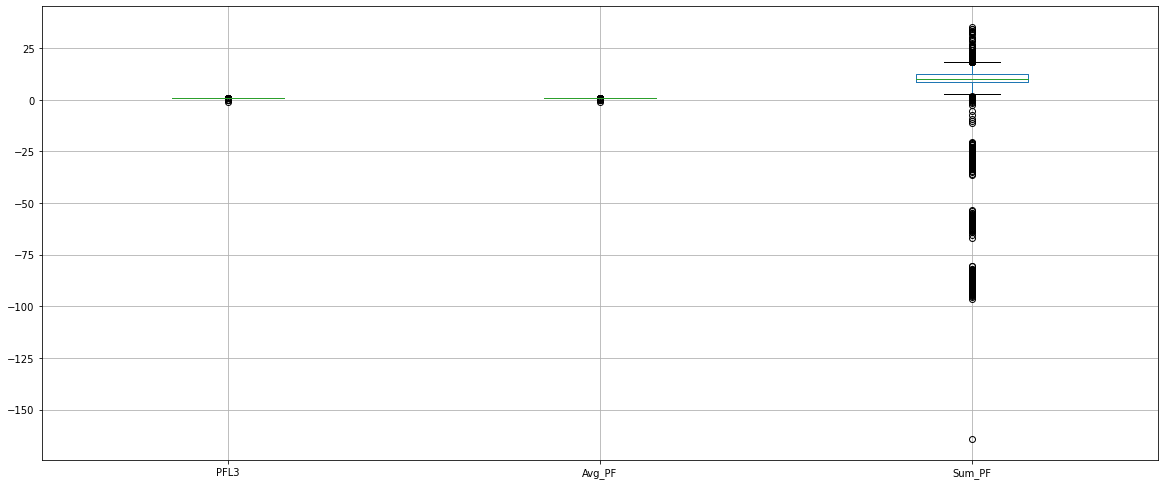

In [185]:
df4.iloc[:,12:15].boxplot(figsize=[20,10])
plt.subplots_adjust(bottom=0.25)
plt.show()

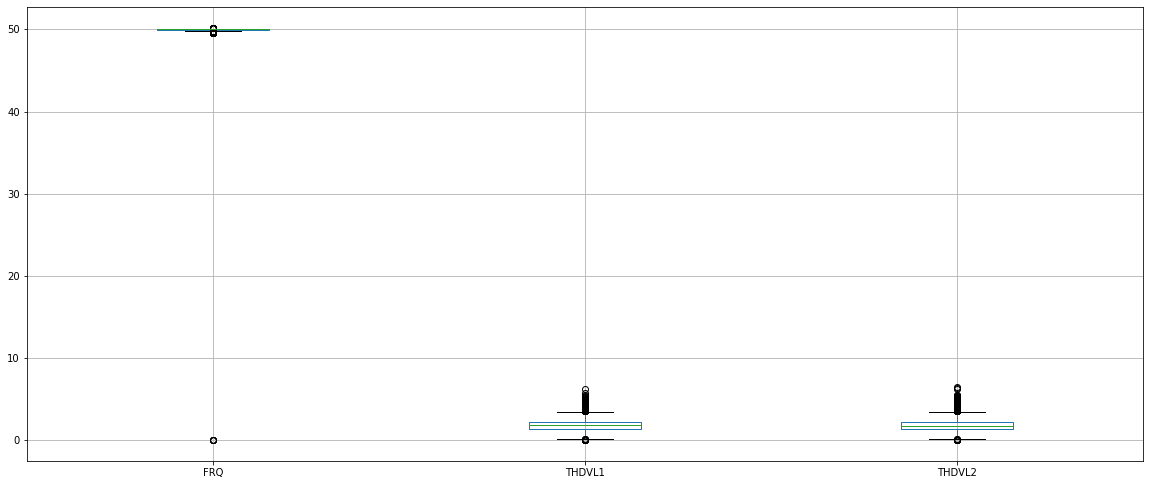

In [186]:
df4.iloc[:,15:18].boxplot(figsize=[20,10])
plt.subplots_adjust(bottom=0.25)
plt.show()

# There are outliers present in features FRQ, THDVL1 anf THDVL2.

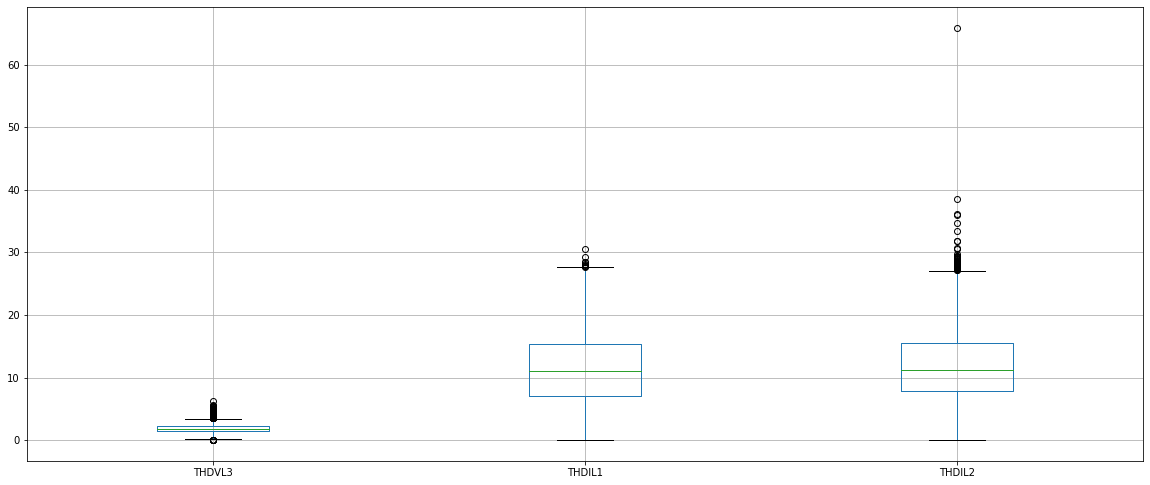

In [187]:
df4.iloc[:,18:21].boxplot(figsize=[20,10])
plt.subplots_adjust(bottom=0.25)
plt.show()

# There are outliers present in features THDVL3, THDIL1 and THDIL2.

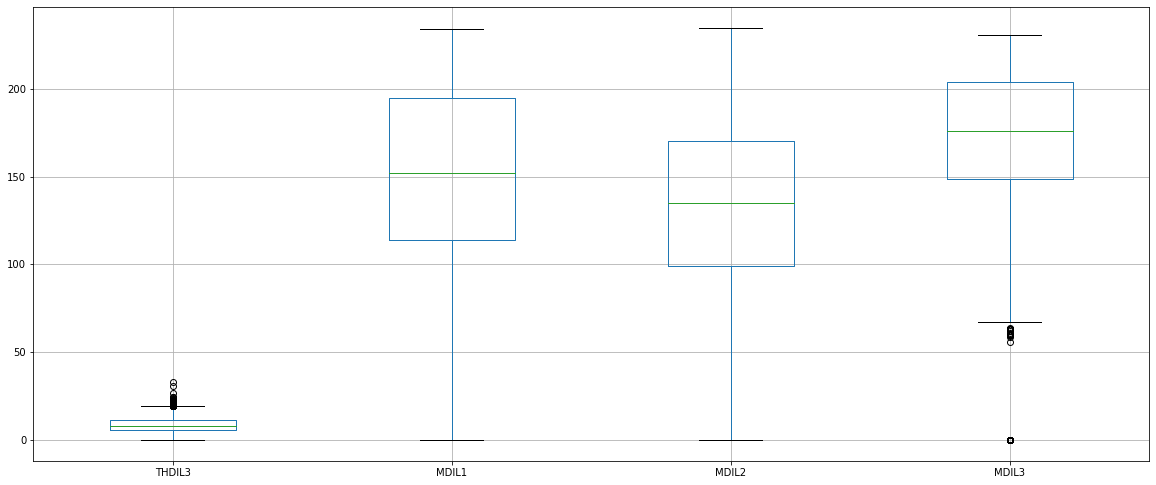

In [189]:
df4.iloc[:,21:25].boxplot(figsize=[20,10])
plt.subplots_adjust(bottom=0.25)
plt.show()

# There are outliers present in feature THDIL3 and MDIL3.

# Assumptions: 

# As features VL1, VL2 ,VL3,VL12,VL23 and VL31 are having outliers in the lower boundary and the acceptable permissible limit is -12.5 on the lower side.

# The few records are having values as zero for features VL1, VL2 , VL3 ,VL12, VL23 and VL31so is has been assumed that the availability of the line is 24*7 without any disturbance like faults and routine maintainence which is an ideal case so the records with value zero needs to be replaced either by mean/median etc. 

# Similarly for features IL1, IL2 and IL3 are having outliers in the upper boundary as per the boxplot. Further, 400 kV tranmission line is designed to carry upto 600 A so any current value below 600 A is not an outlier but for the understanding how one can handle outliers from features IL1, IL2 and IL3 it has been treated as outliers. 

# There are outliers present in feature PFL2 ,PFL3, avg_pf  but it is not to been treated as higher the power factor better it is for system stability.

# Feature sum_pf is having outliers in the upper and lower boundary but there is no such thing/term like sum_pf in power system.

# There are outliers present in feature FRQ both in upper and lower boundary as per box plot. Further, frequency variation of +2.5 on higher side on -2.5 on lower side is accepted so there is no point in treating outliers as the values are well within permissible limit.

# It has been assumed that the availability of the line is 24*7 without any disturbance like faults and routine maintainence which is an ideal case so feature FRQ values cannot be zero so replacing zero values with the fundamental frequency.  i.e 50 HZ

# Outliers present in features THDVL1, THDVL2, THDVL3, THDIL1, THDIL2 and THDIL3 is to be treated.

# Handling of outliers

# Zscore

In [197]:
df5=df4.copy()

In [198]:
from scipy.stats import zscore

In [199]:
z=np.abs(zscore(df5))

In [200]:
np.where(z>3)

(array([    0,     0,     0, ..., 18953, 19143, 19162], dtype=int64),
 array([ 0,  1,  2, ...,  9, 11, 10], dtype=int64))

In [201]:
df6=df5[(z<3).all(axis=1)]

# Keeping only those records where value of z is less than 3 as z value lies between -3 to 3.

In [203]:
df6.shape

(16885, 25)

In [204]:
df4.shape

(19308, 25)

# So after applying Zscore there is a loss of 13% of data which is not good as data is costly and vital.

# IQR (Inter Quartile range)

# The major difference between zscore and IQR method is in zscore we are removing outliers and in IQR the outliers are treated.

In [15]:
df7=df4.copy()

In [16]:
# For outliers
IQR=df7['VL1'].quantile(0.75)-df7['VL1'].quantile(0.25)
lower_bridge=df7['VL1'].quantile(0.25)-(1.5*IQR)
upper_bridge=df7['VL1'].quantile(0.75)+(1.5*IQR)

In [17]:
# For extreme outliers
IQR1=df7['VL1'].quantile(0.75)-df7['VL1'].quantile(0.25)
lower_bridge1=df7['VL1'].quantile(0.25)-(3*IQR1)
upper_bridge1=df7['VL1'].quantile(0.75)+(3*IQR1)

In [215]:
print(lower_bridge1,upper_bridge1)

199.10000000000002 283.79999999999995


# Whether one should take  1.5 * IQR or 3* IQR it's a matter of domain expert.

In [18]:
df7.loc[df7['VL1']<199,'VL1']=199

# The outliers are treated from lower boundary for feature VL1 by replacing all those values less than 199 by 199.

In [19]:
# For extreme outliers
IQR2=df7['VL2'].quantile(0.75)-df7['VL2'].quantile(0.25)
lower_bridge2=df7['VL2'].quantile(0.25)-(3*IQR2)
upper_bridge2=df7['VL2'].quantile(0.75)+(3*IQR2)

In [20]:
print(lower_bridge2,upper_bridge2)

200.3 281.5


In [222]:
df7.loc[df7['VL2']<200,'VL2']=200

# The outliers are treated from lower boundary for feature VL2 by replacing all those values less than 200 by 200.

In [224]:
# For extreme outliers
IQR3=df7['VL3'].quantile(0.75)-df7['VL3'].quantile(0.25)
lower_bridge3=df7['VL3'].quantile(0.25)-(3*IQR3)
upper_bridge3=df7['VL3'].quantile(0.75)+(3*IQR3)

In [225]:
print(lower_bridge3,upper_bridge3)

204.49999999999994 275.9000000000001


In [21]:
df7.loc[df7['VL3']<204,'VL3']=204

# The outliers are treated from lower boundary for feature VL3 by replacing all those values less than 204 by 204.

In [22]:
# For normal outliers
IQR4=df7['IL1'].quantile(0.75)-df7['IL1'].quantile(0.25)
lower_bridge4=df7['IL1'].quantile(0.25)-(1.5*IQR4)
upper_bridge4=df7['IL1'].quantile(0.75)+(1.5*IQR4)

In [23]:
print(lower_bridge4,upper_bridge4)

-33.39999999999999 180.2


In [24]:
df7.loc[df7['IL1']>180,'IL1']=180

# The outliers are treated from upper boundary for feature IL1 by replacing all those values greater than 180 by 180.

In [25]:
# For normal outliers
IQR5=df7['IL2'].quantile(0.75)-df7['IL2'].quantile(0.25)
lower_bridge5=df7['IL2'].quantile(0.25)-(1.5*IQR5)
upper_bridge5=df7['IL2'].quantile(0.75)+(1.5*IQR5)

In [26]:
print(lower_bridge5,upper_bridge5)

-45.4 159.39999999999998


In [27]:
df7.loc[df7['IL2']>160,'IL2']=160

# The outliers are treated from upper boundary for feature IL2 by replacing all those values greater than 160 by 160.

In [28]:
# For normal outliers
IQR6=df7['IL3'].quantile(0.75)-df7['IL3'].quantile(0.25)
lower_bridge6=df7['IL3'].quantile(0.25)-(1.5*IQR6)
upper_bridge6=df7['IL3'].quantile(0.75)+(1.5*IQR6)

In [29]:
print(lower_bridge6,upper_bridge6)

-30.64999999999999 200.95


In [241]:
df7.loc[df7['IL3']>200,'IL3']=200

# The outliers are treated from upper boundary for feature IL3 by replacing all those values greater than 200 by 200.

In [31]:
# For normal outliers
IQR7=df7['VL12'].quantile(0.75)-df7['VL12'].quantile(0.25)
lower_bridge7=df7['VL12'].quantile(0.25)-(1.5*IQR7)
upper_bridge7=df7['VL12'].quantile(0.75)+(1.5*IQR7)

In [32]:
print(lower_bridge7,upper_bridge7)

360.25000000000006 467.84999999999997


In [33]:
df7.loc[df7['VL12']<360,'VL12']=360

# The outliers are treated from lower boundary for feature VL12 by replacing all those values less than 360 by 360.

In [34]:
# For normal outliers
IQR8=df7['VL23'].quantile(0.75)-df7['VL23'].quantile(0.25)
lower_bridge8=df7['VL23'].quantile(0.25)-(1.5*IQR8)
upper_bridge8=df7['VL23'].quantile(0.75)+(1.5*IQR8)

In [35]:
print(lower_bridge8,upper_bridge8)

365.3 461.3


In [36]:
df7.loc[df7['VL23']<365,'VL23']=365

# The outliers are treated from lower boundary for feature VL23 by replacing all those values less than 365 by 365.

In [37]:
# For normal outliers
IQR9=df7['VL31'].quantile(0.75)-df7['VL31'].quantile(0.25)
lower_bridge9=df7['VL31'].quantile(0.25)-(1.5*IQR9)
upper_bridge9=df7['VL31'].quantile(0.75)+(1.5*IQR9)

In [38]:
print(lower_bridge9,upper_bridge9)

363.3499999999999 466.1500000000001


In [39]:
df7.loc[df7['VL31']<363,'VL31']=363

# The outliers are treated from lower boundary for feature VL31 by replacing all those values less than 363 by 363.

In [40]:
# For normal outliers
IQR10=df7['INUT'].quantile(0.75)-df7['INUT'].quantile(0.25)
lower_bridge10=df7['INUT'].quantile(0.25)-(1.5*IQR10)
upper_bridge10=df7['INUT'].quantile(0.75)+(1.5*IQR10)

In [41]:
print(lower_bridge10,upper_bridge10)

-11.55 64.05000000000001


In [43]:
df7.loc[df7['INUT']>64,'INUT']=64

# The outliers are treated from upper  boundary for feature INUT by replacing all those values greater than 64 by 64.

In [44]:
df7['FRQ']=df7['FRQ'].replace(0,50)

In [45]:
df7['FRQ'].value_counts()

50.0    9982
49.9    7547
49.8    1223
50.1     415
49.7     108
50.2      21
49.6      12
Name: FRQ, dtype: int64

# The records having values zero for feature FRQ is replaced by fundamental frequency i.e 50 HZ.

In [46]:
# For normal outliers
IQR11=df7['THDVL1'].quantile(0.75)-df7['THDVL1'].quantile(0.25)
lower_bridge11=df7['THDVL1'].quantile(0.25)-(1.5*IQR11)
upper_bridge11=df7['THDVL1'].quantile(0.75)+(1.5*IQR11)

In [47]:
print(lower_bridge11,upper_bridge11)

0.1999999999999995 3.4000000000000004


In [48]:
df7.loc[df7['THDVL1']>3,'THDVL1']=3

# The outliers are treated from upper boundary for feature THDVL1 by replacing all those values greater than 3 by 3.

In [49]:
# For normal outliers
IQR12=df7['THDVL2'].quantile(0.75)-df7['THDVL2'].quantile(0.25)
lower_bridge12=df7['THDVL2'].quantile(0.25)-(1.5*IQR12)
upper_bridge12=df7['THDVL2'].quantile(0.75)+(1.5*IQR12)

In [50]:
print(lower_bridge12,upper_bridge12)

0.1999999999999995 3.4000000000000004


In [51]:
df7.loc[df7['THDVL2']>3,'THDVL2']=3

# The outliers are treated from upper boundary for feature THDVL2 by replacing all those values greater than 3 by 3.

In [52]:
# For normal outliers
IQR13=df7['THDVL3'].quantile(0.75)-df7['THDVL3'].quantile(0.25)
lower_bridge13=df7['THDVL3'].quantile(0.25)-(1.5*IQR13)
upper_bridge13=df7['THDVL3'].quantile(0.75)+(1.5*IQR13)

In [53]:
print(lower_bridge13,upper_bridge13)

0.1999999999999995 3.4000000000000004


In [54]:
df7.loc[df7['THDVL3']>3,'THDVL3']=3

# The outliers are treated from upper boundary for feature THDVL3 by replacing all those values greater than 3 by 3.

In [55]:
# For normal outliers
IQR14=df7['THDIL1'].quantile(0.75)-df7['THDIL1'].quantile(0.25)
lower_bridge14=df7['THDIL1'].quantile(0.25)-(1.5*IQR14)
upper_bridge14=df7['THDIL1'].quantile(0.75)+(1.5*IQR14)

In [56]:
print(lower_bridge14,upper_bridge14)

-5.200000000000001 27.6


In [57]:
df7.loc[df7['THDIL1']>27,'THDIL1']=27

# The outliers are treated from upper boundary for feature THDIL1 by replacing all those values greater than 27 by 27.¶

In [58]:
# For normal outliers
IQR15=df7['THDIL2'].quantile(0.75)-df7['THDIL2'].quantile(0.25)
lower_bridge15=df7['THDIL2'].quantile(0.25)-(1.5*IQR15)
upper_bridge15=df7['THDIL2'].quantile(0.75)+(1.5*IQR15)

In [59]:
print(lower_bridge15,upper_bridge15)

-3.6499999999999986 27.15


In [60]:
df7.loc[df7['THDIL2']>27,'THDIL2']=27

# The outliers are treated from upper boundary for feature THDIL2 by replacing all those values greater than 27 by 27.

In [61]:
# For normal outliers
IQR16=df7['THDIL3'].quantile(0.75)-df7['THDIL3'].quantile(0.25)
lower_bridge16=df7['THDIL3'].quantile(0.25)-(1.5*IQR16)
upper_bridge16=df7['THDIL3'].quantile(0.75)+(1.5*IQR16)

In [62]:
print(lower_bridge16,upper_bridge16)

-2.1000000000000014 19.5


In [63]:
df7.loc[df7['THDIL3']>20,'THDIL3']=20

# The outliers are treated from upper boundary for feature THDIL3 by replacing all those values greater than 20 by 20.

# Outliers are treated using IQR 

# Skewness Check

In [64]:
skew=df7.skew()

In [65]:
skew

VL1       -0.609582
VL2       -5.874211
VL3       -0.598014
IL1        0.257993
IL2        0.691591
IL3        0.049341
VL12      -1.004196
VL23      -0.948249
VL31      -0.973647
INUT       0.194037
PFL1     -42.776514
PFL2     -20.254979
PFL3     -29.905954
Avg_PF   -43.427255
Sum_PF    -3.650562
FRQ       -0.639471
THDVL1     0.158167
THDVL2     0.377271
THDVL3     0.287897
THDIL1     0.071238
THDIL2     0.047829
THDIL3     0.226918
MDIL1     -0.481636
MDIL2     -0.272657
MDIL3     -1.439183
dtype: float64

# For those features where skewness if greater than 0.5 needs to be treated.

# There are different methods to check skewness 1) power_transform 2) Cube root transformation 3)square root transformation 4)log transformation 5)Boxcox Transformation.

# For this dataset i will be using power_tranform method.

In [66]:
df8=df7.copy()

In [67]:
from sklearn.preprocessing import power_transform
df8['VL12']=power_transform(df8['VL12'].values.reshape(-1,1))

In [68]:
df8['VL1']=power_transform(df8['VL1'].values.reshape(-1,1))
df8['VL2']=power_transform(df8['VL2'].values.reshape(-1,1))
df8['VL3']=power_transform(df8['VL3'].values.reshape(-1,1))
df8['IL2']=power_transform(df8['IL2'].values.reshape(-1,1))
df8['VL23']=power_transform(df8['VL23'].values.reshape(-1,1))
df8['VL31']=power_transform(df8['VL31'].values.reshape(-1,1))
df8['PFL2']=power_transform(df8['PFL2'].values.reshape(-1,1))
df8['PFL3']=power_transform(df8['PFL3'].values.reshape(-1,1))
df8['Avg_PF']=power_transform(df8['Avg_PF'].values.reshape(-1,1))
df8['FRQ']=power_transform(df8['FRQ'].values.reshape(-1,1))
df8['MDIL3']=power_transform(df8['MDIL3'].values.reshape(-1,1))

In [69]:
df8.skew()

VL1       -0.055522
VL2       -0.117563
VL3       -0.022519
IL1        0.257993
IL2       -0.164776
IL3        0.049341
VL12      -0.156678
VL23      -0.132635
VL31      -0.144093
INUT       0.194037
PFL1     -42.776514
PFL2      -0.167316
PFL3      -0.114295
Avg_PF    -0.084408
Sum_PF    -3.650562
FRQ       -0.221094
THDVL1     0.158167
THDVL2     0.377271
THDVL3     0.287897
THDIL1     0.071238
THDIL2     0.047829
THDIL3     0.226918
MDIL1     -0.481636
MDIL2     -0.272657
MDIL3     -1.120863
dtype: float64

# Have treated skewness from data except for dependent feature PFL1.

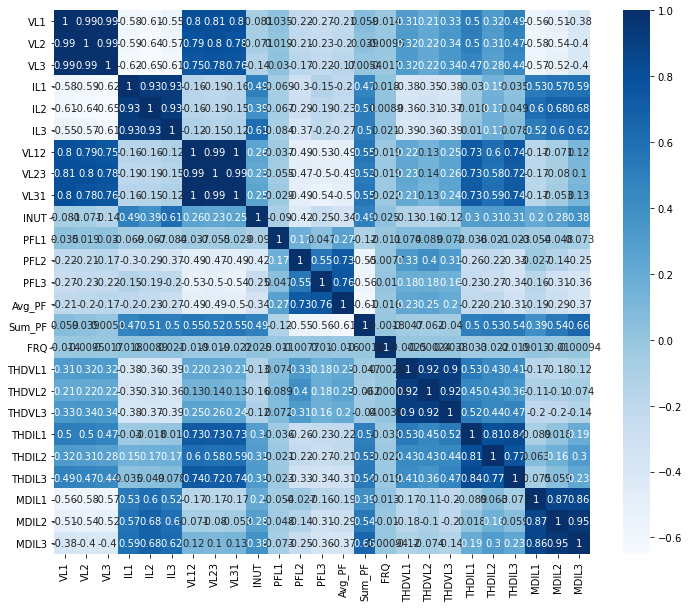

In [307]:
plt.figure(figsize=[12,10])
sns.heatmap(df8.corr(),annot=True,cmap='Blues')
plt.show()

# Using heatmap to find correlation between different independent features and between independent feature and dependent feature.

In [70]:
cor=df8.corr()

In [71]:
cor['PFL1'].sort_values(ascending=False)

PFL1      1.000000
Avg_PF    0.271284
PFL2      0.166699
THDVL2    0.089194
THDVL1    0.074220
THDVL3    0.072318
PFL3      0.046522
VL1       0.036614
VL3       0.030404
VL2       0.023169
FRQ      -0.010616
THDIL2   -0.020833
THDIL3   -0.022944
VL31     -0.028734
THDIL1   -0.036011
VL12     -0.037099
MDIL2    -0.048126
MDIL1    -0.054045
VL23     -0.056500
IL1      -0.068631
IL2      -0.068967
MDIL3    -0.073328
IL3      -0.083943
INUT     -0.090385
Sum_PF   -0.122325
Name: PFL1, dtype: float64

# The above correlation data shows the relationship between independent features and dependent feature.

# PFL1 is having positive correlation with feature Avg_pf

In [72]:
cor1=df8.corr()

In [73]:
cor1

,VL1,VL2,VL3,IL1,IL2,IL3,VL12,VL23,VL31,INUT,...,FRQ,THDVL1,THDVL2,THDVL3,THDIL1,THDIL2,THDIL3,MDIL1,MDIL2,MDIL3
VL1,1.000000,0.992438,0.986370,-0.585258,-0.596920,-0.556173,0.799357,0.795264,0.798435,-0.081478,...,-0.014375,0.308672,0.212606,0.336752,0.505194,0.323350,0.483729,-0.561372,-0.516175,-0.379973
VL2,0.992438,1.000000,0.985226,-0.598148,-0.626246,-0.574871,0.781462,0.780880,0.775973,-0.071469,...,-0.009939,0.321661,0.220657,0.347032,0.498604,0.310378,0.467550,-0.575837,-0.544560,-0.406956
VL3,0.986370,0.985226,1.000000,-0.623350,-0.641499,-0.611469,0.753902,0.759125,0.756974,-0.135021,...,-0.016813,0.316859,0.221234,0.338984,0.467228,0.276549,0.438709,-0.573303,-0.521298,-0.404417
IL1,-0.585258,-0.598148,-0.623350,1.000000,0.926273,0.925829,-0.155345,-0.167900,-0.158203,0.494242,...,0.017734,-0.382543,-0.345810,-0.382342,-0.030117,0.145956,0.035326,0.526476,0.573835,0.593093
IL2,-0.596920,-0.626246,-0.641499,0.926273,1.000000,0.929265,-0.132958,-0.140089,-0.127805,0.399396,...,0.008792,-0.355436,-0.305085,-0.362152,0.003219,0.185347,0.067501,0.607103,0.687116,0.693947
IL3,-0.556173,-0.574871,-0.611469,0.925829,0.929265,1.000000,-0.118202,-0.131385,-0.117949,0.607244,...,0.020981,-0.390887,-0.358669,-0.392151,0.009312,0.166580,0.077668,0.518698,0.595120,0.621097
VL12,0.799357,0.781462,0.753902,-0.155345,-0.132958,-0.118202,1.000000,0.995880,0.997220,0.258451,...,-0.018621,0.220969,0.132637,0.248156,0.734212,0.603296,0.737389,-0.168853,-0.070555,0.116694
VL23,0.795264,0.780880,0.759125,-0.167900,-0.140089,-0.131385,0.995880,1.000000,0.994136,0.243803,...,-0.018489,0.232347,0.141418,0.256379,0.735449,0.597602,0.730753,-0.153536,-0.058007,0.126512
VL31,0.798435,0.775973,0.756974,-0.158203,-0.127805,-0.117949,0.997220,0.994136,1.000000,0.249361,...,-0.021680,0.212673,0.128170,0.241180,0.727069,0.594993,0.735299,-0.167029,-0.052923,0.127126
INUT,-0.081478,-0.071469,-0.135021,0.494242,0.399396,0.607244,0.258451,0.243803,0.249361,1.000000,...,0.024668,-0.133236,-0.155862,-0.120218,0.297033,0.309031,0.313139,0.201804,0.276899,0.378384


# Say for example feature VL1 is taken which is highly positive correlated with features VL2 as well as VL3. Further , as they are highly correlated one of the feature can be dropped by using VIF as all three features are carrying same information by passing same information to the model it can get confused.

In [74]:
df8.shape[1]

25

In [75]:
x=df8.drop('PFL1',axis=1)

In [77]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def cal_vif(data):
    vif=pd.DataFrame({})
    vif['features']=x.columns
    vif['VIF']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return (vif)
cal_vif(x)

,features,VIF
0,VL1,209.519017
1,VL2,166.222108
2,VL3,126.556549
3,IL1,49.479785
4,IL2,19.319578
5,IL3,85.850683
6,VL12,718.162604
7,VL23,315.147484
8,VL31,474.893662
9,INUT,14.332795


# Between features VL1, Vl2 and VL3 VL1 can be dropped as vif value for VL1 is greater as compared to VL2 and VL3 but i am not dropping feature VL1.

# Similarly for other independent features where correlation is greater than 0.95 VIF techniques can be applied and the one's with a higher vif value can be dropped.

In [118]:
X=df8.drop(['PFL1','Sum_PF'],axis=1)
y=df8['PFL1']

I am dropping feature sum_pf as there is no such term as summation of power factor.

# Spliting the data into X and Y

# Applying Robust Scaler on variable X which contains independent features.

In [119]:
from sklearn.preprocessing import StandardScaler

In [120]:
se=StandardScaler()
X=se.fit_transform(X)

# Similarly Robust scaler and min max scaler can also be applied to this dataset.

In [121]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=40)

# Splitting the data into train and test.

# Apply various Machine learning algorithms

In [122]:
from sklearn.linear_model import Lasso,Ridge
list=[LinearRegression(),DecisionTreeRegressor(),SVR(),KNeighborsRegressor(),RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor(),Lasso(),Ridge()]
for i in list:
    al=i
    al.fit(X_train,y_train)
    pred=al.predict(X_test)
    print(i)
    print("mean absolute error is",":",mean_absolute_error(y_test,pred))
    print("mean squared error is",":",np.sqrt(mean_squared_error(y_test,pred)))
    print("r2_score is",":",r2_score(y_test,pred))


LinearRegression()
mean absolute error is : 0.0065583954245216364
mean squared error is : 0.02334629545633754
r2_score is : 0.17096607474506165
DecisionTreeRegressor()
mean absolute error is : 0.002278612118076304
mean squared error is : 0.008195564095541116
r2_score is : 0.897836902853496
SVR()
mean absolute error is : 0.053488946537673714
mean squared error is : 0.056689182036032265
r2_score is : -3.8880622646859315
KNeighborsRegressor()
mean absolute error is : 0.0023987571206628717
mean squared error is : 0.007230753126886459
r2_score is : 0.920475047895829
RandomForestRegressor()
mean absolute error is : 0.002114733298809844
mean squared error is : 0.007836473930697044
r2_score is : 0.9065933633495651
AdaBoostRegressor()
mean absolute error is : 0.014640928400170066
mean squared error is : 0.01633574224772636
r2_score is : 0.5941046343714517
GradientBoostingRegressor()
mean absolute error is : 0.002908564809900072
mean squared error is : 0.008098284369015373
r2_score is : 0.900247

# Checking out cross_val_score of different models.

In [124]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(LinearRegression(),X,y,cv=5)
print(score.mean())

-0.3933673876461074


In [125]:
score1=cross_val_score(DecisionTreeRegressor(),X,y,cv=5)
print(score1.mean())

-2.268033336241826


In [126]:
score2=cross_val_score(SVR(),X,y,cv=5)
print(score2.mean())

-70.39451513566063


In [127]:
score3=cross_val_score(KNeighborsRegressor(),X,y,cv=5)
print(score3.mean())

-0.024105478261145175


In [117]:
score4=cross_val_score(RandomForestRegressor(),X,y,cv=5)
print(score4.mean())

-0.31604303101616266


In [128]:
score5=cross_val_score(AdaBoostRegressor(),X,y,cv=5)
print(score5.mean())

-4.970369811610844


In [129]:
score6=cross_val_score(GradientBoostingRegressor(),X,y,cv=5)
print(score6.mean())

-0.5976985223642045


In [130]:
score7=cross_val_score(Lasso(),X,y,cv=5)
print(score7.mean())

-0.16898550605685067


In [131]:
score8=cross_val_score(Ridge(),X,y,cv=5)
print(score8.mean())

-0.39021298439360963


# The algorithm which is having minimum difference between cross_val_score and r2_Score is selected.

# Say for example linear Regression, Decision Tree Regressor and Gradient BoostingRegressor are having same value i.e minimum difference between cross_val_Score and r2_score so to find best model among them hypertuning is required.

In [133]:
from sklearn.model_selection import RandomizedSearchCV

In [135]:
params={'fit_intercept':['True','False']}

In [136]:
rsc=RandomizedSearchCV(LinearRegression(),param_distributions=params,n_jobs=-1,cv=5)
rsc.fit(X_train,y_train)
rsc.best_params_

{'fit_intercept': 'True'}

In [139]:
le=LinearRegression(fit_intercept='True')
le.fit(X_train,y_train)
pred1=le.predict(X_test)
print(mean_absolute_error(y_test,pred1))
print(np.sqrt(mean_absolute_error(y_test,pred1)))
print(r2_score(y_test,pred1))

0.0065583954245216364
0.08098392077765583
0.17096607474506165


# Hypertuning is applied on Linear regression.

In [141]:
params1={'criterion':['mse','friedman_mse','mae'],'max_depth':np.arange(1,10),'max_features':['auto','sqrt','log2'],'random_state':np.arange(1,100)}

In [143]:
rsc1=RandomizedSearchCV(DecisionTreeRegressor(),param_distributions=params1,n_jobs=-1,cv=5)
rsc1.fit(X_train,y_train)
rsc1.best_params_

{'random_state': 10,
 'max_features': 'auto',
 'max_depth': 9,
 'criterion': 'mse'}

In [145]:
dtc=DecisionTreeRegressor(criterion='mse',max_depth=9,max_features='auto',random_state=10)
dtc.fit(X_train,y_train)
pred2=dtc.predict(X_test)
print(mean_absolute_error(y_test,pred2))
print(np.sqrt(mean_absolute_error(y_test,pred2)))
print(r2_score(y_test,pred2))

0.0024896142633048495
0.04989603454488993
0.914145971421347


# Hypertuning is applied on Decision Tree Regressor.

In [146]:
params2={'n_estimators':[100,200,500],'learning_rate':[.0001,.001,.01,1],'max_depth':np.arange(1,10),'random_state':np.arange(1,100)}

In [147]:
rsc2=RandomizedSearchCV(GradientBoostingRegressor(),param_distributions=params2,n_jobs=-1,cv=5)
rsc2.fit(X_train,y_train)
rsc2.best_params_

{'random_state': 33,
 'n_estimators': 500,
 'max_depth': 6,
 'learning_rate': 0.01}

In [148]:
gr=GradientBoostingRegressor(n_estimators=500,learning_rate=0.01,max_depth=6,random_state=33)
gr.fit(X_train,y_train)
pred3=gr.predict(X_test)
print(mean_absolute_error(y_test,pred3))
print(np.sqrt(mean_absolute_error(y_test,pred3)))
print(r2_score(y_test,pred3))

0.0025579430367478435
0.05057611132489175
0.8582729234460387


# Hytertuning is applied on Gradient Boosting Regressor.

# Based on hypertuning applied on above algorithms Decision tree Regresor is my best model with r2 score of 91% as per assumption made above that the difference between cross_val and r2_Score is minimum for LinearRegression,DecisionTreeRegressor and GradientboostingRegressor.

In [151]:
import joblib

In [152]:
joblib.dump(dtc,'powerfactorprediction.obj')

['powerfactorprediction.obj']

In [153]:
joblib.load('powerfactorprediction.obj')

DecisionTreeRegressor(max_depth=9, max_features='auto', random_state=10)